# Geospatial Analysis with Google Search Dataframe

#### This dataframe encompasses each state's google search score for the keyword "Taylor Swift", using the Google trends search score index. The data is divided into 13 day "periods" that center around the release of each Taylor Swift studio album. 

# Contents

## 01. Relevant questions & hypotheses

## 02. Importing data and libraries

## 03. Data wrangling

## 04. Choropleth plots with folium

## 05. Revisit hypotheses

## 06. Data export


# 01.  Relevant analysis questions and hypotheses

#### These have evolved from the initial data understanding and identifying relationships through scatterplots and catplots. However, I will revisit the list at the end of this step based on what I uncover.

Overall: there are regional differences across states for Taylor Swift google search scores. These differences could be do to any album factor. 

•	States that have higher average album search scores attached to periods for country albums from 2006-2023 will have a lower average album search score for periods for the Midnights, 1989TV and reputation albums as compared to states with lower search scores for country albums from the same periods. 
o*Need to add specific metrics vs. just “higher” 
oNull hypothesis: States that have higher average album search scores attached to periods for country albums from 2006-2023 will have a higher or equal average album search score for periods for the Midnights, 1989TV and reputation albums as compared to states with lower search scores for country albums from the same periods. 

I want to:
-Identify states with highest and lowest search averages
-Identify patterns across years and/or album number
-Examine if there are patterns based on album genre
-Look for trends in Taylor's Version vs. original album preference
-Isolate states that could have the strongest potential relationship with album performance metrics.
-Look for metrics to use to increase specificity for my hypothesis.



#### Google Search Trends Data

How is Google Trends data normalized?
Google Trends normalizes search data to make comparisons between terms easier. Search results are normalized to the time and location of a query by the following process:

Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity. Otherwise, places with the most search volume would always be ranked highest.

The resulting numbers are then scaled on a range of 0 to 100 based on a topic’s proportion to all searches on all topics.

Different regions that show the same search interest for a term don't always have the same total search volumes.

Google Trends does filter out some types of searches, such as:

Searches made by very few people: Trends only shows data for popular terms, so search terms with low volume appear as "0"

Duplicate searches: Trends eliminates repeated searches from the same person over a short period of time.

Special characters: Trends filters out queries with apostrophes and other special characters

# 02. Importing data and libraries

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import requests 
import json
import geopandas as gpd

In [3]:
# Import libraries for choropleth formatting

from branca.element import Template, MacroElement
import webbrowser
from folium import Choropleth, GeoJsonTooltip

In [4]:
# Submit a request to import JSON file, contain spatial data for U.S. states.

response = requests.get('https://coach-courses-us.s3.amazonaws.com/public/courses/data-immersion/A6/6.3/us-states.json')


In [5]:
# Name JSON and check for import

state_geo = response.json()
print(state_geo)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {'type': 'Feature', '

In [6]:
# Create path

path=r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [7]:
# Import google search data frame

goog_st = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'gsearch_st_aggs_updated.csv'), index_col=0)

In [8]:
# Import album aggregates dataframe, with potential to reference or merge info

alb_aggs = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'alb_aggs.csv'), index_col=0)

In [9]:
# Check import of google search

goog_st.head()

period_state                 period period_start_date  \
0     2006/09/28-2006/10/10, Alabama  2006/09/28-2006/10/10        2006-09-28   
1      2006/09/28-2006/10/10, Alaska  2006/09/28-2006/10/10        2006-09-28   
2     2006/09/28-2006/10/10, Arizona  2006/09/28-2006/10/10        2006-09-28   
3    2006/09/28-2006/10/10, Arkansas  2006/09/28-2006/10/10        2006-09-28   
4  2006/09/28-2006/10/10, California  2006/09/28-2006/10/10        2006-09-28   

        state  g_search_score album_event album_id album_release_date  \
0     Alabama               0       Debut    DEBUT         2006-10-24   
1      Alaska               0       Debut    DEBUT         2006-10-24   
2     Arizona               8       Debut    DEBUT         2006-10-24   
3    Arkansas              46       Debut    DEBUT         2006-10-24   
4  California               3       Debut    DEBUT         2006-10-24   

  album_release_day  periods_from_release  ...  alb_num        tv  state_num  \
0           Tuesday                    -2  ...        1  original          1   
1           Tuesday                    -2  ...        1  original          2   
2           Tuesday                    -2  ...        1  original          3   
3           Tuesday                    -2  ...        1  original          4   
4           Tuesday                    -2  ...        1  original          5   

     alb_genre  alb_group_st_search_avg  st_overall_search_avg  \
0  Country pop                       19                     52   
1  Country pop                       19                     46   
2  Country pop                       19                     49   
3  Country pop                       19                     54   
4  Country pop                       19                     46   

   st_group_alb_search_avg tvflag  state alb popularity group  \
0                       21  False       Low search popularity   
1                       16  False       Low search popularity   
2                       15  False       Low search popularity   
3                       30  False       Low search popularity   
4                        6  False       Low search popularity   

            sales_group  
0  Low first week sales  
1  Low first week sales  
2  Low first week sales  
3  Low first week sales  
4  Low first week sales  

[5 rows x 26 columns]

In [10]:
goog_st.shape

(3672, 26)

In [11]:
# Check import of alb_aggs

alb_aggs.head()

album_id                      album_title                tv  alb_num  \
0     1989            1989 (Deluxe Edition)          original      5.0   
1   1989TV  1989 (Taylor's Version)[Deluxe]  Taylor's Version     14.0   
2    DEBUT                            Debut          original      1.0   
3     EVER        evermore (deluxe version)          original      9.0   
4     FEAR        Fearless Platinum Edition          original      2.0   

   alb_track_cnt  w1_trad_album_sales  tot_alb_plays  alb_streams_norm  \
0           19.0            1297000.0     7274954212           2204522   
1           22.0            1359000.0     1462293896         112484136   
2           15.0              39000.0     1164903748            187127   
3           17.0             154500.0     3801516966           3584268   
4           19.0             592300.0     2590571504            473068   

   avg_song_pop  top_s_cnt  ...  acou_m  dance_m  ener_m  instru_m  live_m  \
0     67.157895        5.0  ...  0.0692    0.633  0.6920  0.000006  0.1180   
1     79.818182       14.0  ...  0.0386    0.610  0.6785  0.000010  0.1135   
2     63.133333        1.0  ...  0.0868    0.576  0.6720  0.000000  0.1280   
3     72.764706        9.0  ...  0.8300    0.546  0.5170  0.000066  0.1140   
4     45.947368        2.0  ...  0.1300    0.592  0.6360  0.000000  0.1130   

   loud_m  speech_m    temp_m  val_m     dur_m  
0  -6.104    0.0549  119.9970  0.495  220440.0  
1  -6.483    0.0442  118.0225  0.374  224955.0  
2  -4.931    0.0293  115.0280  0.428  213053.0  
3 -10.381    0.0377  122.0790  0.354  245026.0  
4  -4.993    0.0308  118.9820  0.307  244240.0  

[5 rows x 27 columns]

In [12]:
alb_aggs.shape

(14, 27)

In [13]:
# Prompt matplotlib visuals to appear in notebook

%matplotlib inline

# 03. Data wrangling

In [14]:
goog_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'state alb popularity group',
       'sales_group'],
      dtype='object')

In [15]:
# Create df with only selected columns

goog_st = goog_st[['state',
                   'g_search_score', 
                   'album_event', 'album_id', 
                   'album_release_date',
                   'periods_from_release', 
                   'us_search_avg', 
                   'alb_num', 
                   'tv', 
                   'state_num',
                   'alb_group_st_search_avg', 
                   'st_overall_search_avg',
                   'st_group_alb_search_avg', 
                   'tvflag', 
                   'state alb popularity group']]

In [16]:
goog_st.head(100)

state  g_search_score album_event album_id album_release_date  \
0         Alabama               0       Debut    DEBUT         2006-10-24   
1          Alaska               0       Debut    DEBUT         2006-10-24   
2         Arizona               8       Debut    DEBUT         2006-10-24   
3        Arkansas              46       Debut    DEBUT         2006-10-24   
4      California               3       Debut    DEBUT         2006-10-24   
..            ...             ...         ...      ...                ...   
95           Utah               0       Debut    DEBUT         2006-10-24   
96        Vermont               0       Debut    DEBUT         2006-10-24   
97       Virginia               9       Debut    DEBUT         2006-10-24   
98     Washington               4       Debut    DEBUT         2006-10-24   
99  West Virginia               0       Debut    DEBUT         2006-10-24   

    periods_from_release  us_search_avg  alb_num        tv  state_num  \
0                     -2             69        1  original          1   
1                     -2             69        1  original          2   
2                     -2             69        1  original          3   
3                     -2             69        1  original          4   
4                     -2             69        1  original          5   
..                   ...            ...      ...       ...        ...   
95                    -1             78        1  original         45   
96                    -1             78        1  original         46   
97                    -1             78        1  original         47   
98                    -1             78        1  original         48   
99                    -1             78        1  original         49   

    alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
0                        19                     52                       21   
1                        19                     46                       16   
2                        19                     49                       15   
3                        19                     54                       30   
4                        19                     46                        6   
..                      ...                    ...                      ...   
95                       19                     71                       23   
96                       19                     60                       14   
97                       19                     48                       15   
98                       19                     53                       11   
99                       19                     56                       34   

    tvflag state alb popularity group  
0    False      Low search popularity  
1    False      Low search popularity  
2    False      Low search popularity  
3    False      Low search popularity  
4    False      Low search popularity  
..     ...                        ...  
95   False      Low search popularity  
96   False      Low search popularity  
97   False      Low search popularity  
98   False      Low search popularity  
99   False      Low search popularity  

[100 rows x 15 columns]

In [17]:
goog_st.shape

(3672, 15)

## Create additional variables relevant to geospatial analysis 
### (prior to cleaning)

##### -Most popular album (can be as a number so I can map) from max average search score
##### -Least popular album from min average search score
##### -Total google search score from sum of all search scores
##### -Genre totals
##### -TV vs.  originals vs. always owned vs. upcoming)

### max scores

In [18]:
# Find the max g_search_score for each state

max_scores = goog_st.groupby('state')['g_search_score'].max()

In [19]:
max_scores

state
Alabama                  93
Alaska                  100
Arizona                  72
Arkansas                 85
California              100
Colorado                100
Connecticut              90
Delaware                100
District of Columbia    100
Florida                  62
Georgia                  77
Hawaii                   78
Idaho                    84
Illinois                 80
Indiana                  86
Iowa                     94
Kansas                  100
Kentucky                 92
Louisiana                85
Maine                   100
Maryland                 71
Massachusetts           100
Michigan                 84
Minnesota               100
Mississippi              93
Missouri                100
Montana                  86
Nebraska                100
Nevada                   75
New Hampshire           100
New Jersey               85
New Mexico               79
New York                 78
North Carolina           74
North Dakota            100
Ohio          

In [20]:
# Isolate the matching values and identify the associated album_id

max_scores_info = goog_st.loc[goog_st.groupby('state')['g_search_score'].idxmax()]

In [21]:
max_scores_info

state  g_search_score                   album_event  \
3468               Alabama              93                      Fearless   
2296                Alaska             100    Fearless(Taylor's Version)   
716                Arizona              72                          1989   
717               Arkansas              85                          1989   
1636            California             100  Speak Now (Taylor's Version)   
1535              Colorado             100  Speak Now (Taylor's Version)   
720            Connecticut              90                          1989   
313               Delaware             100                     Speak Now   
875   District of Columbia             100                    Reputation   
723                Florida              62                          1989   
928                Georgia              77                    Reputation   
725                 Hawaii              78                          1989   
3327                 Idaho              84                           Red   
931               Illinois              80                    Reputation   
932                Indiana              86                    Reputation   
3432                  Iowa              94                      Fearless   
1699                Kansas             100       1989 (Taylor's Version)   
425               Kentucky              92                     Speak Now   
222              Louisiana              85                         Debut   
427                  Maine             100                     Speak Now   
683               Maryland              71                          1989   
939          Massachusetts             100                    Reputation   
430               Michigan              84                     Speak Now   
1451             Minnesota             100  Speak Now (Taylor's Version)   
228            Mississippi              93                         Debut   
1810              Missouri             100       1989 (Taylor's Version)   
2372               Montana              86                      folklore   
3393              Nebraska             100                      Fearless   
742                 Nevada              75                          1989   
3344         New Hampshire             100                           Red   
3345            New Jersey              85                           Red   
3550            New Mexico              79                      Fearless   
746               New York              78                          1989   
441         North Carolina              74                     Speak Now   
85            North Dakota             100                         Debut   
1514                  Ohio              95  Speak Now (Taylor's Version)   
444               Oklahoma              85                     Speak Now   
2638                Oregon              81                         Lover   
3353          Pennsylvania              93                           Red   
141           Rhode Island             100                         Debut   
244         South Carolina              83                         Debut   
3509          South Dakota             100                      Fearless   
246              Tennessee             100                         Debut   
757                  Texas              71                          1989   
605                   Utah             100                          1989   
1218               Vermont             100                     Midnights   
2086              Virginia              72                      evermore   
1628            Washington             100  Speak Now (Taylor's Version)   
48           West Virginia             100                         Debut   
763              Wisconsin              80                          1989   
3467               Wyoming              80                      Fearless   

     album_id album_release_date  periods_from_release  us_search_av

In [22]:
max_scores_info['st_top_album'] = max_scores_info['album_id']

In [23]:
max_scores_info.head()

state  g_search_score                   album_event album_id  \
3468     Alabama              93                      Fearless     FEAR   
2296      Alaska             100    Fearless(Taylor's Version)   FEARTV   
716      Arizona              72                          1989     1989   
717     Arkansas              85                          1989     1989   
1636  California             100  Speak Now (Taylor's Version)  SPEAKTV   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
3468         2008-11-11                     0             63        2   
2296         2021-04-09                     2             80       10   
716          2014-10-27                     2             51        5   
717          2014-10-27                     2             51        5   
1636         2023-07-07                     2             60       13   

                    tv  state_num  alb_group_st_search_avg  \
3468          original          1                       57   
2296  Taylor's Version          2                       56   
716           original          3                       67   
717           original          4                       67   
1636  Taylor's Version          5                       29   

      st_overall_search_avg  st_group_alb_search_avg  tvflag  \
3468                     52                       70   False   
2296                     46                       62    True   
716                      49                       62   False   
717                      54                       72   False   
1636                     46                       41    True   

     state alb popularity group st_top_album  
3468     High search popularity         FEAR  
2296   Medium search popularity       FEARTV  
716    Medium search popularity         1989  
717      High search popularity         1989  
1636      Low search popularity      SPEAKTV

In [24]:
max_scores_info.rename(columns = {'g_search_score': 'max_gsearch_score'}, inplace=True)

In [25]:
max_scores_info.columns

Index(['state', 'max_gsearch_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'st_top_album'],
      dtype='object')

In [26]:
# Create new column using for loop that makes the album into an album number, numerical form
# This will allow for mapping and aggregates to maintain the value n the aggregated df


top_alb_num = []

for value in max_scores_info['album_id']:
    if value == "1989":
        top_alb_num.append(5)
    elif value == "DEBUT":
        top_alb_num.append(1)
    elif value == "REP":
        top_alb_num.append(6)
    elif value == "FEAR":
        top_alb_num.append(2)
    elif value == "LOVE":
        top_alb_num.append(7)
    elif value == "SPEAK":
        top_alb_num.append(3)
    elif value == "RED":
        top_alb_num.append(4)
    elif value == "FOLK":
        top_alb_num.append(8)
    elif value == "EVER":
        top_alb_num.append(9)
    elif value == "FEARTV":
        top_alb_num.append(10)
    elif value == "REDTV":
        top_alb_num.append(11)
    elif value == "MIDN":
        top_alb_num.append(12)
    elif value == "SPEAKTV":
        top_alb_num.append(13)
    elif value == "1989TV":
        top_alb_num.append(14)
    else:
        top_alb_num.append("unknown")

In [27]:
max_scores_info['top_alb_num'] = top_alb_num

In [28]:
max_scores_info['top_alb_num'].value_counts(dropna=False)

top_alb_num
5     11
1      7
2      6
3      6
13     5
6      5
4      4
14     2
10     1
8      1
7      1
12     1
9      1
Name: count, dtype: int64

In [29]:
max_scores_info.columns

Index(['state', 'max_gsearch_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'st_top_album', 'top_alb_num'],
      dtype='object')

In [30]:
st_max_mapping = max_scores_info[['state', 'max_gsearch_score', 'st_top_album', 'top_alb_num']]

In [31]:
st_max_mapping

state  max_gsearch_score st_top_album  top_alb_num
3468               Alabama                 93         FEAR            2
2296                Alaska                100       FEARTV           10
716                Arizona                 72         1989            5
717               Arkansas                 85         1989            5
1636            California                100      SPEAKTV           13
1535              Colorado                100      SPEAKTV           13
720            Connecticut                 90         1989            5
313               Delaware                100        SPEAK            3
875   District of Columbia                100          REP            6
723                Florida                 62         1989            5
928                Georgia                 77          REP            6
725                 Hawaii                 78         1989            5
3327                 Idaho                 84          RED            4
931               Illinois                 80          REP            6
932                Indiana                 86          REP            6
3432                  Iowa                 94         FEAR            2
1699                Kansas                100       1989TV           14
425               Kentucky                 92        SPEAK            3
222              Louisiana                 85        DEBUT            1
427                  Maine                100        SPEAK            3
683               Maryland                 71         1989            5
939          Massachusetts                100          REP            6
430               Michigan                 84        SPEAK            3
1451             Minnesota                100      SPEAKTV           13
228            Mississippi                 93        DEBUT            1
1810              Missouri                100       1989TV           14
2372               Montana                 86         FOLK            8
3393              Nebraska                100         FEAR            2
742                 Nevada                 75         1989            5
3344         New Hampshire                100          RED            4
3345            New Jersey                 85          RED            4
3550            New Mexico                 79         FEAR            2
746               New York                 78         1989            5
441         North Carolina                 74        SPEAK            3
85            North Dakota                100        DEBUT            1
1514                  Ohio                 95      SPEAKTV           13
444               Oklahoma                 85        SPEAK            3
2638                Oregon                 81         LOVE            7
3353          Pennsylvania                 93          RED            4
141           Rhode Island                100        DEBUT            1
244         South Carolina                 83        DEBUT            1
3509          South Dakota                100         FEAR            2
246              Tennessee                100        DEBUT            1
757                  Texas                 71         1989            5
605                   Utah                100         1989            5
1218               Vermont                100         MIDN           12
2086              Virginia                 72         EVER            9
1628            Washington                100      SPEAKTV           13
48           West Virginia                100        DEBUT            1
763              Wisconsin                 80         1989            5
3467               Wyoming                 80         FEAR            2

In [32]:
st_max_mapping.shape

(51, 4)

In [33]:
goog_st.shape

(3672, 15)

In [34]:
# Merge st_max_mapping dataframe with goog_st, using state as overlap

merged_goog_max = pd.merge(goog_st, st_max_mapping, on='state', how='left')

In [35]:
merged_goog_max.shape

(3672, 18)

In [36]:
merged_goog_max.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
dtype: int64

In [37]:
merged_goog_max.head(25)

state  g_search_score album_event album_id  \
0                Alabama               0       Debut    DEBUT   
1                 Alaska               0       Debut    DEBUT   
2                Arizona               8       Debut    DEBUT   
3               Arkansas              46       Debut    DEBUT   
4             California               3       Debut    DEBUT   
5               Colorado               7       Debut    DEBUT   
6            Connecticut               0       Debut    DEBUT   
7               Delaware               0       Debut    DEBUT   
8   District of Columbia               0       Debut    DEBUT   
9                Florida               6       Debut    DEBUT   
10               Georgia               3       Debut    DEBUT   
11                Hawaii               0       Debut    DEBUT   
12                 Idaho              25       Debut    DEBUT   
13              Illinois               3       Debut    DEBUT   
14               Indiana               8       Debut    DEBUT   
15                  Iowa               0       Debut    DEBUT   
16                Kansas              13       Debut    DEBUT   
17              Kentucky              11       Debut    DEBUT   
18             Louisiana              11       Debut    DEBUT   
19                 Maine              33       Debut    DEBUT   
20              Maryland               0       Debut    DEBUT   
21         Massachusetts               5       Debut    DEBUT   
22              Michigan              15       Debut    DEBUT   
23             Minnesota              15       Debut    DEBUT   
24           Mississippi               0       Debut    DEBUT   

   album_release_date  periods_from_release  us_search_avg  alb_num        tv  \
0          2006-10-24                    -2             69        1  original   
1          2006-10-24                    -2             69        1  original   
2          2006-10-24                    -2             69        1  original   
3          2006-10-24                    -2             69        1  original   
4          2006-10-24                    -2             69        1  original   
5          2006-10-24                    -2             69        1  original   
6          2006-10-24                    -2             69        1  original   
7          2006-10-24                    -2             69        1  original   
8          2006-10-24                    -2             69        1  original   
9          2006-10-24                    -2             69        1  original   
10         2006-10-24                    -2             69        1  original   
11         2006-10-24                    -2             69        1  original   
12         2006-10-24                    -2             69        1  original   
13         2006-10-24                    -2             69        1  original   
14         2006-10-24                    -2             69        1  original   
15         2006-10-24                    -2             69        1  original   
16         2006-10-24                    -2             69        1  original   
17         2006-10-24                    -2             69        1  original   
18         2006-10-24                    -2             69        1  original   
19         2006-10-24                    -2             69        1  original   
20         2006-10-24                    -2             69        1  original   
21         2006-10-24                    -2             69        1  original   
22         2006-10-24                    -2             69        1  original   
23         2006-10-24                    -2             69        1  original   
24         2006-10-24                    -2             69        1  original   

    state_num  alb_group_st_search_avg  st_overall_search_avg  \
0           1                       19                     52   
1           2                       19                     46   
2           3             

### min search values (least favorite albums)

In [38]:
# Find the min g_search_score for each state

min_scores = goog_st.groupby('state')['g_search_score'].min()

In [39]:
min_scores

state
Alabama                  0
Alaska                   0
Arizona                  0
Arkansas                 0
California               2
Colorado                 7
Connecticut              0
Delaware                 0
District of Columbia     0
Florida                  4
Georgia                  3
Hawaii                   0
Idaho                    0
Illinois                 2
Indiana                  0
Iowa                     0
Kansas                   0
Kentucky                10
Louisiana                0
Maine                    0
Maryland                 0
Massachusetts            5
Michigan                10
Minnesota                5
Mississippi              0
Missouri                11
Montana                  0
Nebraska                18
Nevada                   0
New Hampshire            0
New Jersey               3
New Mexico               0
New York                 4
North Carolina          14
North Dakota             0
Ohio                    13
Oklahoma              

In [40]:
# Isolate the matching values and identify the associated album_id

min_scores_info = goog_st.loc[goog_st.groupby('state')['g_search_score'].idxmin()]

In [41]:
min_scores_info

state  g_search_score                   album_event  \
0                  Alabama               0                         Debut   
1                   Alaska               0                         Debut   
53                 Arizona               0                         Debut   
54                Arkansas               0                         Debut   
55              California               2                         Debut   
5                 Colorado               7                         Debut   
6              Connecticut               0                         Debut   
7                 Delaware               0                         Debut   
8     District of Columbia               0                         Debut   
60                 Florida               4                         Debut   
10                 Georgia               3                         Debut   
11                  Hawaii               0                         Debut   
63                   Idaho               0                         Debut   
64                Illinois               2                         Debut   
65                 Indiana               0                         Debut   
15                    Iowa               0                         Debut   
67                  Kansas               0                         Debut   
68                Kentucky              10                         Debut   
69               Louisiana               0                         Debut   
223                  Maine               0                         Debut   
20                Maryland               0                         Debut   
21           Massachusetts               5                         Debut   
73                Michigan              10                         Debut   
74               Minnesota               5                         Debut   
24             Mississippi               0                         Debut   
25                Missouri              11                         Debut   
26                 Montana               0                         Debut   
180               Nebraska              18                         Debut   
28                  Nevada               0                         Debut   
80           New Hampshire               0                         Debut   
81              New Jersey               3                         Debut   
31              New Mexico               0                         Debut   
32                New York               4                         Debut   
1614        North Carolina              14  Speak Now (Taylor's Version)   
34            North Dakota               0                         Debut   
188                   Ohio              13                         Debut   
87                Oklahoma               6                         Debut   
139                 Oregon               7                         Debut   
191           Pennsylvania              12                         Debut   
39            Rhode Island               0                         Debut   
91          South Carolina               0                         Debut   
41            South Dakota               0                         Debut   
93               Tennessee              12                         Debut   
43                   Texas               7                         Debut   
44                    Utah               0                         Debut   
45                 Vermont               0                         Debut   
97                Virginia               9                         Debut   
47              Washington               4                         Debut   
99           West Virginia               0                         Debut   
151              Wisconsin               7                         Debut   
152                Wyoming               0                         Debut   

     album_id album_release_date  periods_from_release  us_search_av

In [42]:
# Designate bottom album

min_scores_info['st_lowest_album'] = min_scores_info['album_id']

In [43]:
min_scores_info.head()

state  g_search_score album_event album_id album_release_date  \
0      Alabama               0       Debut    DEBUT         2006-10-24   
1       Alaska               0       Debut    DEBUT         2006-10-24   
53     Arizona               0       Debut    DEBUT         2006-10-24   
54    Arkansas               0       Debut    DEBUT         2006-10-24   
55  California               2       Debut    DEBUT         2006-10-24   

    periods_from_release  us_search_avg  alb_num        tv  state_num  \
0                     -2             69        1  original          1   
1                     -2             69        1  original          2   
53                    -1             78        1  original          3   
54                    -1             78        1  original          4   
55                    -1             78        1  original          5   

    alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
0                        19                     52                       21   
1                        19                     46                       16   
53                       19                     49                       15   
54                       19                     54                       30   
55                       19                     46                        6   

    tvflag state alb popularity group st_lowest_album  
0    False      Low search popularity           DEBUT  
1    False      Low search popularity           DEBUT  
53   False      Low search popularity           DEBUT  
54   False      Low search popularity           DEBUT  
55   False      Low search popularity           DEBUT

In [44]:
min_scores_info.rename(columns = {'g_search_score': 'min_gsearch_score'}, inplace=True)

In [45]:
min_scores_info.columns

Index(['state', 'min_gsearch_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'st_lowest_album'],
      dtype='object')

In [46]:
# Create new column using for loop that makes the album into an album number, numerical form
# This will allow for mapping and aggregates to maintain the value n the aggregated df

low_alb_num = []

for value in min_scores_info['album_id']:
    if value == "1989":
        low_alb_num.append(5)
    elif value == "DEBUT":
        low_alb_num.append(1)
    elif value == "REP":
        low_alb_num.append(6)
    elif value == "FEAR":
        low_alb_num.append(2)
    elif value == "LOVE":
        low_alb_num.append(7)
    elif value == "SPEAK":
        low_alb_num.append(3)
    elif value == "RED":
        low_alb_num.append(4)
    elif value == "FOLK":
        low_alb_num.append(8)
    elif value == "EVER":
        low_alb_num.append(9)
    elif value == "FEARTV":
        low_alb_num.append(10)
    elif value == "REDTV":
        low_alb_num.append(11)
    elif value == "MIDN":
        low_alb_num.append(12)
    elif value == "SPEAKTV":
        low_alb_num.append(13)
    elif value == "1989TV":
        low_alb_num.append(14)
    else:
        low_alb_num.append("unknown")

In [47]:
min_scores_info['low_alb_num'] = low_alb_num

In [48]:
min_scores_info['low_alb_num'].value_counts(dropna=False)

low_alb_num
1     50
13     1
Name: count, dtype: int64

In [49]:
st_min_mapping = min_scores_info[['state', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num']]

In [50]:
st_min_mapping

state  min_gsearch_score st_lowest_album  low_alb_num
0                  Alabama                  0           DEBUT            1
1                   Alaska                  0           DEBUT            1
53                 Arizona                  0           DEBUT            1
54                Arkansas                  0           DEBUT            1
55              California                  2           DEBUT            1
5                 Colorado                  7           DEBUT            1
6              Connecticut                  0           DEBUT            1
7                 Delaware                  0           DEBUT            1
8     District of Columbia                  0           DEBUT            1
60                 Florida                  4           DEBUT            1
10                 Georgia                  3           DEBUT            1
11                  Hawaii                  0           DEBUT            1
63                   Idaho                  0           DEBUT            1
64                Illinois                  2           DEBUT            1
65                 Indiana                  0           DEBUT            1
15                    Iowa                  0           DEBUT            1
67                  Kansas                  0           DEBUT            1
68                Kentucky                 10           DEBUT            1
69               Louisiana                  0           DEBUT            1
223                  Maine                  0           DEBUT            1
20                Maryland                  0           DEBUT            1
21           Massachusetts                  5           DEBUT            1
73                Michigan                 10           DEBUT            1
74               Minnesota                  5           DEBUT            1
24             Mississippi                  0           DEBUT            1
25                Missouri                 11           DEBUT            1
26                 Montana                  0           DEBUT            1
180               Nebraska                 18           DEBUT            1
28                  Nevada                  0           DEBUT            1
80           New Hampshire                  0           DEBUT            1
81              New Jersey                  3           DEBUT            1
31              New Mexico                  0           DEBUT            1
32                New York                  4           DEBUT            1
1614        North Carolina                 14         SPEAKTV           13
34            North Dakota                  0           DEBUT            1
188                   Ohio                 13           DEBUT            1
87                Oklahoma                  6           DEBUT            1
139                 Oregon                  7           DEBUT            1
191           Pennsylvania                 12           DEBUT            1
39            Rhode Island                  0           DEBUT            1
91          South Carolina                  0           DEBUT            1
41            South Dakota                  0           DEBUT            1
93               Tennessee                 12           DEBUT            1
43                   Texas                  7           DEBUT            1
44                    Utah                  0           DEBUT            1
45                 Vermont                  0           DEBUT            1
97                Virginia                  9           DEBUT            1
47              Washington                  4           DEBUT            1
99           West Virginia                  0           DEBUT            1
151              Wisconsin                  7           DEBUT            1
152                Wyoming                  0           DEBUT            1

In [51]:
# Merge st_max_mapping dataframe with goog_st, using state as overlap

merged_goog_maxmin = pd.merge(merged_goog_max, st_min_mapping, on='state', how='left')

In [52]:
merged_goog_maxmin.shape

(3672, 21)

In [53]:
merged_goog_maxmin.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num'],
      dtype='object')

### Create album aggregates

#### mean and sum of google search score for each state grouped by album_id


#### Midnights, MIDN, 12

In [54]:
# Isolate the matching values and identify the associated album_id

MIDN_scores = goog_st.loc[goog_st['album_id'] == "MIDN"]

In [55]:
MIDN_scores

state  g_search_score         album_event album_id  \
1020        Alabama              49  Midnights_announce     MIDN   
1021         Alaska              46  Midnights_announce     MIDN   
1022        Arizona              44  Midnights_announce     MIDN   
1023       Arkansas              47  Midnights_announce     MIDN   
1024     California              44  Midnights_announce     MIDN   
...             ...             ...                 ...      ...   
1423       Virginia              58           Midnights     MIDN   
1424     Washington              67           Midnights     MIDN   
1425  West Virginia              64           Midnights     MIDN   
1426      Wisconsin              72           Midnights     MIDN   
1427        Wyoming              50           Midnights     MIDN   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
1020         2022-10-27                    -5             29       12   
1021         2022-10-27                    -5             29       12   
1022         2022-10-27                    -5             29       12   
1023         2022-10-27                    -5             29       12   
1024         2022-10-27                    -5             29       12   
...                 ...                   ...            ...      ...   
1423         2022-10-27                     2             66       12   
1424         2022-10-27                     2             66       12   
1425         2022-10-27                     2             66       12   
1426         2022-10-27                     2             66       12   
1427         2022-10-27                     2             66       12   

            tv  state_num  alb_group_st_search_avg  st_overall_search_avg  \
1020  original          1                       56                     52   
1021  original          2                       56                     46   
1022  original          3                       56                     49   
1023  original          4                       56                     54   
1024  original          5                       56                     46   
...        ...        ...                      ...                    ...   
1423  original         47                       56                     48   
1424  original         48                       56                     53   
1425  original         49                       56                     56   
1426  original         50                       56                     56   
1427  original         51                       56                     45   

      st_group_alb_search_avg  tvflag state alb popularity group  
1020                       54   False   Medium search popularity  
1021                       48   False      Low search popularity  
1022                       52   False   Medium search popularity  
1023                       58   False   Medium search popularity  
1024                       49   False      Low search popularity  
...                       ...     ...                        ...  
1423                       53   False   Medium search popularity  
1424                       58   False   Medium search popularity  
1425                       55   False   Medium search popularity  
1426                       58   False   Medium search popularity  
1427                       40   False      Low search popularity  

[408 rows x 15 columns]

In [56]:
## aggregate "google search scores"

MIDN_aggs = MIDN_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [57]:
MIDN_aggs

state    mean  sum
0                Alabama  54.250  434
1                 Alaska  48.000  384
2                Arizona  52.875  423
3               Arkansas  58.125  465
4             California  49.750  398
5               Colorado  58.375  467
6            Connecticut  65.125  521
7               Delaware  52.875  423
8   District of Columbia  98.125  785
9                Florida  43.875  351
10               Georgia  47.750  382
11                Hawaii  38.750  310
12                 Idaho  56.000  448
13              Illinois  60.500  484
14               Indiana  59.000  472
15                  Iowa  57.500  460
16                Kansas  56.750  454
17              Kentucky  62.875  503
18             Louisiana  47.375  379
19                 Maine  64.250  514
20              Maryland  50.875  407
21         Massachusetts  81.625  653
22              Michigan  54.875  439
23             Minnesota  64.750  518
24           Mississippi  39.500  316
25              Missouri  59.750  478
26               Montana  48.500  388
27              Nebraska  60.125  481
28                Nevada  41.875  335
29         New Hampshire  65.500  524
30            New Jersey  54.750  438
31            New Mexico  40.625  325
32              New York  50.750  406
33        North Carolina  53.625  429
34          North Dakota  51.500  412
35                  Ohio  57.250  458
36              Oklahoma  51.750  414
37                Oregon  57.125  457
38          Pennsylvania  65.625  525
39          Rhode Island  85.125  681
40        South Carolina  50.375  403
41          South Dakota  48.625  389
42             Tennessee  63.500  508
43                 Texas  47.750  382
44                  Utah  78.500  628
45               Vermont  74.625  597
46              Virginia  53.875  431
47            Washington  58.875  471
48         West Virginia  55.500  444
49             Wisconsin  58.375  467
50               Wyoming  40.000  320

In [58]:
## Rename columns

MIDN_aggs.columns = ['state', 'MIDN_avg_score', 'MIDN_sum']

In [59]:
MIDN_aggs

state  MIDN_avg_score  MIDN_sum
0                Alabama          54.250       434
1                 Alaska          48.000       384
2                Arizona          52.875       423
3               Arkansas          58.125       465
4             California          49.750       398
5               Colorado          58.375       467
6            Connecticut          65.125       521
7               Delaware          52.875       423
8   District of Columbia          98.125       785
9                Florida          43.875       351
10               Georgia          47.750       382
11                Hawaii          38.750       310
12                 Idaho          56.000       448
13              Illinois          60.500       484
14               Indiana          59.000       472
15                  Iowa          57.500       460
16                Kansas          56.750       454
17              Kentucky          62.875       503
18             Louisiana          47.375       379
19                 Maine          64.250       514
20              Maryland          50.875       407
21         Massachusetts          81.625       653
22              Michigan          54.875       439
23             Minnesota          64.750       518
24           Mississippi          39.500       316
25              Missouri          59.750       478
26               Montana          48.500       388
27              Nebraska          60.125       481
28                Nevada          41.875       335
29         New Hampshire          65.500       524
30            New Jersey          54.750       438
31            New Mexico          40.625       325
32              New York          50.750       406
33        North Carolina          53.625       429
34          North Dakota          51.500       412
35                  Ohio          57.250       458
36              Oklahoma          51.750       414
37                Oregon          57.125       457
38          Pennsylvania          65.625       525
39          Rhode Island          85.125       681
40        South Carolina          50.375       403
41          South Dakota          48.625       389
42             Tennessee          63.500       508
43                 Texas          47.750       382
44                  Utah          78.500       628
45               Vermont          74.625       597
46              Virginia          53.875       431
47            Washington          58.875       471
48         West Virginia          55.500       444
49             Wisconsin          58.375       467
50               Wyoming          40.000       320

In [60]:
# Merge MIDN data with overall dataframe.
# Will start rename to track albums- using track number. Final df should have gmerge_1234567891011121314
# Review shape

merged_goog_maxmin.shape

(3672, 21)

In [61]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge12= pd.merge(merged_goog_maxmin, MIDN_aggs, on='state', how='left')

In [62]:
# Check merge shape
gmerge12.shape

(3672, 23)

In [63]:
# Check for nulls

gmerge12.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
dtype: int64

In [64]:
# Check tail

gmerge12.tail(20)

state  g_search_score              album_event album_id  \
3652      New Mexico              46  1989 (Taylor's Version)   1989TV   
3653        New York              50  1989 (Taylor's Version)   1989TV   
3654  North Carolina              57  1989 (Taylor's Version)   1989TV   
3655    North Dakota              60  1989 (Taylor's Version)   1989TV   
3656            Ohio              72  1989 (Taylor's Version)   1989TV   
3657        Oklahoma              59  1989 (Taylor's Version)   1989TV   
3658          Oregon              57  1989 (Taylor's Version)   1989TV   
3659    Pennsylvania              72  1989 (Taylor's Version)   1989TV   
3660    Rhode Island              77  1989 (Taylor's Version)   1989TV   
3661  South Carolina              54  1989 (Taylor's Version)   1989TV   
3662    South Dakota              68  1989 (Taylor's Version)   1989TV   
3663       Tennessee              53  1989 (Taylor's Version)   1989TV   
3664           Texas              52  1989 (Taylor's Version)   1989TV   
3665            Utah              78  1989 (Taylor's Version)   1989TV   
3666         Vermont              77  1989 (Taylor's Version)   1989TV   
3667        Virginia              59  1989 (Taylor's Version)   1989TV   
3668      Washington              63  1989 (Taylor's Version)   1989TV   
3669   West Virginia              63  1989 (Taylor's Version)   1989TV   
3670       Wisconsin              56  1989 (Taylor's Version)   1989TV   
3671         Wyoming              58  1989 (Taylor's Version)   1989TV   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
3652         2023-10-27                     1             69       14   
3653         2023-10-27                     1             69       14   
3654         2023-10-27                     1             69       14   
3655         2023-10-27                     1             69       14   
3656         2023-10-27                     1             69       14   
3657         2023-10-27                     1             69       14   
3658         2023-10-27                     1             69       14   
3659         2023-10-27                     1             69       14   
3660         2023-10-27                     1             69       14   
3661         2023-10-27                     1             69       14   
3662         2023-10-27                     1             69       14   
3663         2023-10-27                     1             69       14   
3664         2023-10-27                     1             69       14   
3665         2023-10-27                     1             69       14   
3666         2023-10-27                     1             69       14   
3667         2023-10-27                     1             69       14   
3668         2023-10-27                     1             69       14   
3669         2023-10-27                     1             69       14   
3670         2023-10-27                     1             69       14   
3671         2023-10-27                     1             69       14   

                    tv  state_num  ...  tvflag  state alb popularity group  \
3652  Taylor's Version         32  ...    True       Low search popularity   
3653  Taylor's Version         33  ...    True       Low search popularity   
3654  Taylor's Version         34  ...    True    Medium search popularity   
3655  Taylor's Version         35  ...    True      High search popularity   
3656  Taylor's Version         36  ...    True      High search popularity   
3657  Taylor's Version         37  ...    True    Medium search popularity   
3658  Taylor's Version         38  ...    True    Medium search popularity   
3659  Taylor's Version         39  ...    True      High search popularity   
3660  Taylor's Version         40  ...    True      High search popularity   
3661  Taylor's Version         41  ...    True    Medium search popularity   
3662  Taylor's Version         42  ...    True      High search popu

### Debut, DEBUT, 1
Will start from beginning now that I tested the process on midnights

In [65]:
# Isolate album values

DEBUT_scores = goog_st.loc[goog_st['album_id'] == "DEBUT"]

In [66]:
DEBUT_scores.head(20)

state  g_search_score album_event album_id  \
0                Alabama               0       Debut    DEBUT   
1                 Alaska               0       Debut    DEBUT   
2                Arizona               8       Debut    DEBUT   
3               Arkansas              46       Debut    DEBUT   
4             California               3       Debut    DEBUT   
5               Colorado               7       Debut    DEBUT   
6            Connecticut               0       Debut    DEBUT   
7               Delaware               0       Debut    DEBUT   
8   District of Columbia               0       Debut    DEBUT   
9                Florida               6       Debut    DEBUT   
10               Georgia               3       Debut    DEBUT   
11                Hawaii               0       Debut    DEBUT   
12                 Idaho              25       Debut    DEBUT   
13              Illinois               3       Debut    DEBUT   
14               Indiana               8       Debut    DEBUT   
15                  Iowa               0       Debut    DEBUT   
16                Kansas              13       Debut    DEBUT   
17              Kentucky              11       Debut    DEBUT   
18             Louisiana              11       Debut    DEBUT   
19                 Maine              33       Debut    DEBUT   

   album_release_date  periods_from_release  us_search_avg  alb_num        tv  \
0          2006-10-24                    -2             69        1  original   
1          2006-10-24                    -2             69        1  original   
2          2006-10-24                    -2             69        1  original   
3          2006-10-24                    -2             69        1  original   
4          2006-10-24                    -2             69        1  original   
5          2006-10-24                    -2             69        1  original   
6          2006-10-24                    -2             69        1  original   
7          2006-10-24                    -2             69        1  original   
8          2006-10-24                    -2             69        1  original   
9          2006-10-24                    -2             69        1  original   
10         2006-10-24                    -2             69        1  original   
11         2006-10-24                    -2             69        1  original   
12         2006-10-24                    -2             69        1  original   
13         2006-10-24                    -2             69        1  original   
14         2006-10-24                    -2             69        1  original   
15         2006-10-24                    -2             69        1  original   
16         2006-10-24                    -2             69        1  original   
17         2006-10-24                    -2             69        1  original   
18         2006-10-24                    -2             69        1  original   
19         2006-10-24                    -2             69        1  original   

    state_num  alb_group_st_search_avg  st_overall_search_avg  \
0           1                       19                     52   
1           2                       19                     46   
2           3                       19                     49   
3           4                       19                     54   
4           5                       19                     46   
5           6                       19                     54   
6           7                       19                     63   
7           8                       19                     54   
8           9                       19                     68   
9          10                       19                     41   
10         11                       19                     46   
11         12                       19                     38   
12         13                       19                     57   
13         14                       19   

In [67]:
# aggregate "google search scores"

DEBUT_aggs = DEBUT_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()


In [68]:
DEBUT_aggs

state  mean  sum
0                Alabama  21.6  108
1                 Alaska  16.6   83
2                Arizona  15.4   77
3               Arkansas  30.8  154
4             California   6.0   30
5               Colorado  16.8   84
6            Connecticut   9.8   49
7               Delaware  17.0   85
8   District of Columbia   4.0   20
9                Florida  12.2   61
10               Georgia  22.2  111
11                Hawaii   0.0    0
12                 Idaho  30.4  152
13              Illinois  12.6   63
14               Indiana  12.2   61
15                  Iowa  23.0  115
16                Kansas  21.6  108
17              Kentucky  28.4  142
18             Louisiana  31.0  155
19                 Maine  24.0  120
20              Maryland   9.0   45
21         Massachusetts  16.2   81
22              Michigan  25.0  125
23             Minnesota  21.8  109
24           Mississippi  18.6   93
25              Missouri  16.0   80
26               Montana  18.2   91
27              Nebraska  36.0  180
28                Nevada  13.0   65
29         New Hampshire  17.4   87
30            New Jersey   8.4   42
31            New Mexico  21.0  105
32              New York  11.0   55
33        North Carolina  25.2  126
34          North Dakota  40.0  200
35                  Ohio  28.4  142
36              Oklahoma  21.8  109
37                Oregon  10.8   54
38          Pennsylvania  24.4  122
39          Rhode Island  34.4  172
40        South Carolina  23.2  116
41          South Dakota   7.8   39
42             Tennessee  37.6  188
43                 Texas  17.8   89
44                  Utah  23.4  117
45               Vermont  14.8   74
46              Virginia  15.8   79
47            Washington  11.0   55
48         West Virginia  34.6  173
49             Wisconsin  16.2   81
50               Wyoming  18.2   91

In [69]:
# Rename columns

DEBUT_aggs.columns = ['state', 'DEBUT_avg_score', 'DEBUT_sum']

In [70]:
DEBUT_aggs.columns

Index(['state', 'DEBUT_avg_score', 'DEBUT_sum'], dtype='object')

In [71]:
# Merge DEBUT data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge12.shape

(3672, 23)

In [72]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge112= pd.merge(gmerge12, DEBUT_aggs, on='state', how='left')

In [73]:
gmerge112.shape

(3672, 25)

In [74]:
gmerge112.head()

state  g_search_score album_event album_id album_release_date  \
0     Alabama               0       Debut    DEBUT         2006-10-24   
1      Alaska               0       Debut    DEBUT         2006-10-24   
2     Arizona               8       Debut    DEBUT         2006-10-24   
3    Arkansas              46       Debut    DEBUT         2006-10-24   
4  California               3       Debut    DEBUT         2006-10-24   

   periods_from_release  us_search_avg  alb_num        tv  state_num  ...  \
0                    -2             69        1  original          1  ...   
1                    -2             69        1  original          2  ...   
2                    -2             69        1  original          3  ...   
3                    -2             69        1  original          4  ...   
4                    -2             69        1  original          5  ...   

   max_gsearch_score  st_top_album  top_alb_num  min_gsearch_score  \
0                 93          FEAR            2                  0   
1                100        FEARTV           10                  0   
2                 72          1989            5                  0   
3                 85          1989            5                  0   
4                100       SPEAKTV           13                  2   

  st_lowest_album  low_alb_num MIDN_avg_score  MIDN_sum  DEBUT_avg_score  \
0           DEBUT            1         54.250       434             21.6   
1           DEBUT            1         48.000       384             16.6   
2           DEBUT            1         52.875       423             15.4   
3           DEBUT            1         58.125       465             30.8   
4           DEBUT            1         49.750       398              6.0   

  DEBUT_sum  
0       108  
1        83  
2        77  
3       154  
4        30  

[5 rows x 25 columns]

### Fearless, FEAR, 2

In [75]:
# Isolate album values

FEAR_scores = goog_st.loc[goog_st['album_id'] == "FEAR"]

In [76]:
FEAR_scores 

state  g_search_score album_event album_id album_release_date  \
3366        Alabama              65    Fearless     FEAR         2008-11-11   
3367         Alaska              77    Fearless     FEAR         2008-11-11   
3368        Arizona              37    Fearless     FEAR         2008-11-11   
3369       Arkansas              73    Fearless     FEAR         2008-11-11   
3370     California              23    Fearless     FEAR         2008-11-11   
...             ...             ...         ...      ...                ...   
3616       Virginia              35    Fearless     FEAR         2008-11-11   
3617     Washington              41    Fearless     FEAR         2008-11-11   
3618  West Virginia             100    Fearless     FEAR         2008-11-11   
3619      Wisconsin              70    Fearless     FEAR         2008-11-11   
3620        Wyoming              57    Fearless     FEAR         2008-11-11   

      periods_from_release  us_search_avg  alb_num        tv  state_num  \
3366                    -2             74        2  original          1   
3367                    -2             74        2  original          2   
3368                    -2             74        2  original          3   
3369                    -2             74        2  original          4   
3370                    -2             74        2  original          5   
...                    ...            ...      ...       ...        ...   
3616                     2             74        2  original         47   
3617                     2             74        2  original         48   
3618                     2             74        2  original         49   
3619                     2             74        2  original         50   
3620                     2             74        2  original         51   

      alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
3366                       57                     52                       70   
3367                       57                     46                       46   
3368                       57                     49                       42   
3369                       57                     54                       67   
3370                       57                     46                       28   
...                       ...                    ...                      ...   
3616                       57                     48                       35   
3617                       57                     53                       41   
3618                       57                     56                       81   
3619                       57                     56                       69   
3620                       57                     45                       54   

      tvflag state alb popularity group  
3366   False     High search popularity  
3367   False      Low search popularity  
3368   False      Low search popularity  
3369   False     High search popularity  
3370   False      Low search popularity  
...      ...                        ...  
3616   False      Low search popularity  
3617   False      Low search popularity  
3618   False     High search popularity  
3619   False     High search popularity  
3620   False   Medium search popularity  

[255 rows x 15 columns]

In [77]:
# aggregate "google search scores"

FEAR_aggs = FEAR_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [78]:
FEAR_aggs

state  mean  sum
0                Alabama  70.8  354
1                 Alaska  46.4  232
2                Arizona  42.8  214
3               Arkansas  67.8  339
4             California  28.0  140
5               Colorado  41.6  208
6            Connecticut  64.6  323
7               Delaware  62.2  311
8   District of Columbia  37.6  188
9                Florida  37.8  189
10               Georgia  54.4  272
11                Hawaii  24.2  121
12                 Idaho  59.8  299
13              Illinois  47.6  238
14               Indiana  71.6  358
15                  Iowa  77.6  388
16                Kansas  85.0  425
17              Kentucky  76.0  380
18             Louisiana  62.2  311
19                 Maine  68.2  341
20              Maryland  42.8  214
21         Massachusetts  47.8  239
22              Michigan  70.6  353
23             Minnesota  60.6  303
24           Mississippi  64.0  320
25              Missouri  61.6  308
26               Montana  49.6  248
27              Nebraska  81.6  408
28                Nevada  39.4  197
29         New Hampshire  68.6  343
30            New Jersey  48.6  243
31            New Mexico  47.8  239
32              New York  38.8  194
33        North Carolina  60.0  300
34          North Dakota  77.2  386
35                  Ohio  65.0  325
36              Oklahoma  59.6  298
37                Oregon  38.6  193
38          Pennsylvania  67.8  339
39          Rhode Island  67.4  337
40        South Carolina  68.6  343
41          South Dakota  85.6  428
42             Tennessee  69.8  349
43                 Texas  52.0  260
44                  Utah  63.2  316
45               Vermont  35.4  177
46              Virginia  35.8  179
47            Washington  41.8  209
48         West Virginia  81.0  405
49             Wisconsin  69.0  345
50               Wyoming  54.4  272

In [79]:
# Rename columns

FEAR_aggs.columns = ['state', 'FEAR_avg_score', 'FEAR_sum']

In [80]:
FEAR_aggs

state  FEAR_avg_score  FEAR_sum
0                Alabama            70.8       354
1                 Alaska            46.4       232
2                Arizona            42.8       214
3               Arkansas            67.8       339
4             California            28.0       140
5               Colorado            41.6       208
6            Connecticut            64.6       323
7               Delaware            62.2       311
8   District of Columbia            37.6       188
9                Florida            37.8       189
10               Georgia            54.4       272
11                Hawaii            24.2       121
12                 Idaho            59.8       299
13              Illinois            47.6       238
14               Indiana            71.6       358
15                  Iowa            77.6       388
16                Kansas            85.0       425
17              Kentucky            76.0       380
18             Louisiana            62.2       311
19                 Maine            68.2       341
20              Maryland            42.8       214
21         Massachusetts            47.8       239
22              Michigan            70.6       353
23             Minnesota            60.6       303
24           Mississippi            64.0       320
25              Missouri            61.6       308
26               Montana            49.6       248
27              Nebraska            81.6       408
28                Nevada            39.4       197
29         New Hampshire            68.6       343
30            New Jersey            48.6       243
31            New Mexico            47.8       239
32              New York            38.8       194
33        North Carolina            60.0       300
34          North Dakota            77.2       386
35                  Ohio            65.0       325
36              Oklahoma            59.6       298
37                Oregon            38.6       193
38          Pennsylvania            67.8       339
39          Rhode Island            67.4       337
40        South Carolina            68.6       343
41          South Dakota            85.6       428
42             Tennessee            69.8       349
43                 Texas            52.0       260
44                  Utah            63.2       316
45               Vermont            35.4       177
46              Virginia            35.8       179
47            Washington            41.8       209
48         West Virginia            81.0       405
49             Wisconsin            69.0       345
50               Wyoming            54.4       272

In [81]:
# Merge FEAR data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge112.shape

(3672, 25)

In [82]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge1212= pd.merge(gmerge112, FEAR_aggs, on='state', how='left')

In [83]:
gmerge1212.shape

(3672, 27)

### Speak Now, SPEAK, 3

In [84]:
# Isolate album values

SPEAK_scores = goog_st.loc[goog_st['album_id'] == "SPEAK"]

In [85]:
SPEAK_scores.head(20)

state  g_search_score album_event album_id  \
255               Alabama              53   Speak Now    SPEAK   
256                Alaska              59   Speak Now    SPEAK   
257               Arizona              42   Speak Now    SPEAK   
258              Arkansas              60   Speak Now    SPEAK   
259            California              28   Speak Now    SPEAK   
260              Colorado              44   Speak Now    SPEAK   
261           Connecticut              66   Speak Now    SPEAK   
262              Delaware              66   Speak Now    SPEAK   
263  District of Columbia              41   Speak Now    SPEAK   
264               Florida              40   Speak Now    SPEAK   
265               Georgia              40   Speak Now    SPEAK   
266                Hawaii              30   Speak Now    SPEAK   
267                 Idaho              61   Speak Now    SPEAK   
268              Illinois              44   Speak Now    SPEAK   
269               Indiana              59   Speak Now    SPEAK   
270                  Iowa              63   Speak Now    SPEAK   
271                Kansas              65   Speak Now    SPEAK   
272              Kentucky              54   Speak Now    SPEAK   
273             Louisiana              50   Speak Now    SPEAK   
274                 Maine              46   Speak Now    SPEAK   

    album_release_date  periods_from_release  us_search_avg  alb_num  \
255         2010-10-25                    -2             71        3   
256         2010-10-25                    -2             71        3   
257         2010-10-25                    -2             71        3   
258         2010-10-25                    -2             71        3   
259         2010-10-25                    -2             71        3   
260         2010-10-25                    -2             71        3   
261         2010-10-25                    -2             71        3   
262         2010-10-25                    -2             71        3   
263         2010-10-25                    -2             71        3   
264         2010-10-25                    -2             71        3   
265         2010-10-25                    -2             71        3   
266         2010-10-25                    -2             71        3   
267         2010-10-25                    -2             71        3   
268         2010-10-25                    -2             71        3   
269         2010-10-25                    -2             71        3   
270         2010-10-25                    -2             71        3   
271         2010-10-25                    -2             71        3   
272         2010-10-25                    -2             71        3   
273         2010-10-25                    -2             71        3   
274         2010-10-25                    -2             71        3   

           tv  state_num  alb_group_st_search_avg  st_overall_search_avg  \
255  original          1                       60                     52   
256  original          2                       60                     46   
257  original          3                       60                     49   
258  original          4                       60                     54   
259  original          5                       60                     46   
260  original          6                       60                     54   
261  original          7                       60                     63   
262  original          8                       60                     54   
263  original          9                       60                     68   
264  original         10                       60                     41   
265  original         11                       60                     46   
266  original         12                       60                     38   
267  original         13                       60                     57   
268  original         14                       60       

In [86]:
# aggregate "google search scores"

SPEAK_aggs = SPEAK_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()


In [87]:
SPEAK_aggs

state  mean  sum
0                Alabama  65.6  328
1                 Alaska  52.0  260
2                Arizona  52.0  260
3               Arkansas  61.6  308
4             California  32.0  160
5               Colorado  48.4  242
6            Connecticut  73.8  369
7               Delaware  74.8  374
8   District of Columbia  49.0  245
9                Florida  45.4  227
10               Georgia  49.8  249
11                Hawaii  41.8  209
12                 Idaho  59.8  299
13              Illinois  52.6  263
14               Indiana  72.2  361
15                  Iowa  63.6  318
16                Kansas  72.2  361
17              Kentucky  71.0  355
18             Louisiana  55.2  276
19                 Maine  70.2  351
20              Maryland  56.4  282
21         Massachusetts  70.6  353
22              Michigan  71.0  355
23             Minnesota  58.0  290
24           Mississippi  55.0  275
25              Missouri  62.0  310
26               Montana  54.0  270
27              Nebraska  64.2  321
28                Nevada  52.6  263
29         New Hampshire  85.4  427
30            New Jersey  63.8  319
31            New Mexico  40.6  203
32              New York  50.2  251
33        North Carolina  63.2  316
34          North Dakota  67.6  338
35                  Ohio  68.6  343
36              Oklahoma  64.4  322
37                Oregon  47.4  237
38          Pennsylvania  73.6  368
39          Rhode Island  94.6  473
40        South Carolina  63.2  316
41          South Dakota  79.4  397
42             Tennessee  68.6  343
43                 Texas  46.6  233
44                  Utah  65.6  328
45               Vermont  56.8  284
46              Virginia  32.8  164
47            Washington  49.2  246
48         West Virginia  71.0  355
49             Wisconsin  63.0  315
50               Wyoming  45.8  229

In [88]:
# Rename columns

SPEAK_aggs.columns = ['state', 'SPEAK_avg_score', 'SPEAK_sum']

In [89]:
SPEAK_aggs.columns

Index(['state', 'SPEAK_avg_score', 'SPEAK_sum'], dtype='object')

In [90]:
# Merge SPEAK data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge1212.shape

(3672, 27)

In [91]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge12312= pd.merge(gmerge1212, SPEAK_aggs, on='state', how='left')

In [92]:
gmerge12312.shape

(3672, 29)

In [93]:
# Check for nulls

gmerge12312.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
dtype: int64

### Red, RED, 4

In [94]:
# Isolate album values

RED_scores = goog_st.loc[goog_st['album_id'] == "RED"]

In [95]:
RED_scores

state  g_search_score album_event album_id album_release_date  \
3111        Alabama              70         Red      RED         2012-10-22   
3112         Alaska              50         Red      RED         2012-10-22   
3113        Arizona              67         Red      RED         2012-10-22   
3114       Arkansas              66         Red      RED         2012-10-22   
3115     California              55         Red      RED         2012-10-22   
...             ...             ...         ...      ...                ...   
3361       Virginia              69         Red      RED         2012-10-22   
3362     Washington              61         Red      RED         2012-10-22   
3363  West Virginia              81         Red      RED         2012-10-22   
3364      Wisconsin              69         Red      RED         2012-10-22   
3365        Wyoming              64         Red      RED         2012-10-22   

      periods_from_release  us_search_avg  alb_num        tv  state_num  \
3111                    -2             65        4  original          1   
3112                    -2             65        4  original          2   
3113                    -2             65        4  original          3   
3114                    -2             65        4  original          4   
3115                    -2             65        4  original          5   
...                    ...            ...      ...       ...        ...   
3361                     2             68        4  original         47   
3362                     2             68        4  original         48   
3363                     2             68        4  original         49   
3364                     2             68        4  original         50   
3365                     2             68        4  original         51   

      alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
3111                       67                     52                       65   
3112                       67                     46                       54   
3113                       67                     49                       65   
3114                       67                     54                       68   
3115                       67                     46                       59   
...                       ...                    ...                      ...   
3361                       67                     48                       63   
3362                       67                     53                       56   
3363                       67                     56                       75   
3364                       67                     56                       64   
3365                       67                     45                       51   

      tvflag state alb popularity group  
3111   False     High search popularity  
3112   False   Medium search popularity  
3113   False     High search popularity  
3114   False     High search popularity  
3115   False   Medium search popularity  
...      ...                        ...  
3361   False   Medium search popularity  
3362   False   Medium search popularity  
3363   False     High search popularity  
3364   False     High search popularity  
3365   False   Medium search popularity  

[255 rows x 15 columns]

In [96]:
# aggregate "google search scores"

RED_aggs = RED_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [97]:
RED_aggs

state  mean  sum
0                Alabama  65.2  326
1                 Alaska  54.0  270
2                Arizona  65.0  325
3               Arkansas  68.2  341
4             California  59.2  296
5               Colorado  55.4  277
6            Connecticut  77.4  387
7               Delaware  80.2  401
8   District of Columbia  52.8  264
9                Florida  53.0  265
10               Georgia  56.2  281
11                Hawaii  41.8  209
12                 Idaho  72.0  360
13              Illinois  58.8  294
14               Indiana  76.6  383
15                  Iowa  68.4  342
16                Kansas  67.0  335
17              Kentucky  82.2  411
18             Louisiana  59.4  297
19                 Maine  83.8  419
20              Maryland  59.0  295
21         Massachusetts  87.8  439
22              Michigan  70.6  353
23             Minnesota  60.0  300
24           Mississippi  63.4  317
25              Missouri  65.2  326
26               Montana  52.2  261
27              Nebraska  77.4  387
28                Nevada  53.0  265
29         New Hampshire  97.4  487
30            New Jersey  75.4  377
31            New Mexico  53.8  269
32              New York  56.2  281
33        North Carolina  64.6  323
34          North Dakota  70.0  350
35                  Ohio  75.4  377
36              Oklahoma  70.2  351
37                Oregon  54.4  272
38          Pennsylvania  84.4  422
39          Rhode Island  96.4  482
40        South Carolina  70.2  351
41          South Dakota  66.8  334
42             Tennessee  76.4  382
43                 Texas  60.6  303
44                  Utah  88.6  443
45               Vermont  70.2  351
46              Virginia  63.2  316
47            Washington  56.4  282
48         West Virginia  75.8  379
49             Wisconsin  64.6  323
50               Wyoming  51.2  256

In [98]:
# Rename columns

RED_aggs.columns = ['state', 'RED_avg_score', 'RED_sum']

In [99]:
RED_aggs.columns

Index(['state', 'RED_avg_score', 'RED_sum'], dtype='object')

In [100]:
# Merge MIDN data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge12312.shape

(3672, 29)

In [101]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge123412= pd.merge(gmerge12312, RED_aggs, on='state', how='left')

In [102]:
gmerge123412.shape

(3672, 31)

In [103]:
# Check for nulls

gmerge123412.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
dtype: i

### 1989, 1989, 5

In [104]:
# Isolate album values

scores_1989 = goog_st.loc[goog_st['album_id'] == "1989"]

In [105]:
scores_1989.head()

state  g_search_score album_event album_id album_release_date  \
510     Alabama              59        1989     1989         2014-10-27   
511      Alaska              52        1989     1989         2014-10-27   
512     Arizona              61        1989     1989         2014-10-27   
513    Arkansas              69        1989     1989         2014-10-27   
514  California              52        1989     1989         2014-10-27   

     periods_from_release  us_search_avg  alb_num        tv  state_num  \
510                    -2             81        5  original          1   
511                    -2             81        5  original          2   
512                    -2             81        5  original          3   
513                    -2             81        5  original          4   
514                    -2             81        5  original          5   

     alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
510                       67                     52                       67   
511                       67                     46                       52   
512                       67                     49                       62   
513                       67                     54                       72   
514                       67                     46                       63   

     tvflag state alb popularity group  
510   False     High search popularity  
511   False   Medium search popularity  
512   False   Medium search popularity  
513   False     High search popularity  
514   False   Medium search popularity

In [106]:
# aggregate "google search scores"

aggs_1989 = scores_1989.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [107]:
aggs_1989

state  mean  sum
0                Alabama  67.6  338
1                 Alaska  52.0  260
2                Arizona  62.4  312
3               Arkansas  72.0  360
4             California  63.0  315
5               Colorado  63.6  318
6            Connecticut  78.2  391
7               Delaware  73.0  365
8   District of Columbia  79.2  396
9                Florida  54.4  272
10               Georgia  54.4  272
11                Hawaii  66.4  332
12                 Idaho  71.6  358
13              Illinois  60.6  303
14               Indiana  77.0  385
15                  Iowa  75.4  377
16                Kansas  60.4  302
17              Kentucky  76.0  380
18             Louisiana  63.4  317
19                 Maine  73.4  367
20              Maryland  63.2  316
21         Massachusetts  80.2  401
22              Michigan  65.4  327
23             Minnesota  71.2  356
24           Mississippi  67.2  336
25              Missouri  67.0  335
26               Montana  66.8  334
27              Nebraska  74.4  372
28                Nevada  56.4  282
29         New Hampshire  80.0  400
30            New Jersey  68.2  341
31            New Mexico  56.2  281
32              New York  68.8  344
33        North Carolina  64.0  320
34          North Dakota  75.2  376
35                  Ohio  71.0  355
36              Oklahoma  70.2  351
37                Oregon  40.2  201
38          Pennsylvania  77.8  389
39          Rhode Island  99.4  497
40        South Carolina  68.2  341
41          South Dakota  78.8  394
42             Tennessee  76.4  382
43                 Texas  60.6  303
44                  Utah  87.4  437
45               Vermont  72.8  364
46              Virginia  46.6  233
47            Washington  62.6  313
48         West Virginia  62.0  310
49             Wisconsin  68.2  341
50               Wyoming  53.8  269

In [108]:
# Rename columns

aggs_1989.columns = ['state', '1989_avg_score', '1989_sum']

In [109]:
aggs_1989.columns

Index(['state', '1989_avg_score', '1989_sum'], dtype='object')

In [110]:
# Merge 1989 data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge123412.shape

(3672, 31)

In [111]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge1234512= pd.merge(gmerge123412, aggs_1989, on='state', how='left')

In [112]:
gmerge1234512.shape

(3672, 33)

In [113]:
gmerge1234512.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### reputation, REP, 6

In [114]:
# Isolate album values

REP_scores = goog_st.loc[goog_st['album_id'] == "REP"]

In [115]:
REP_scores.head()

state  g_search_score album_event album_id album_release_date  \
765     Alabama              73  Reputation      REP         2017-11-10   
766      Alaska              71  Reputation      REP         2017-11-10   
767     Arizona              56  Reputation      REP         2017-11-10   
768    Arkansas              76  Reputation      REP         2017-11-10   
769  California              61  Reputation      REP         2017-11-10   

     periods_from_release  us_search_avg  alb_num        tv  state_num  \
765                    -2             50        6  original          1   
766                    -2             50        6  original          2   
767                    -2             50        6  original          3   
768                    -2             50        6  original          4   
769                    -2             50        6  original          5   

     alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
765                       65                     52                       65   
766                       65                     46                       55   
767                       65                     49                       62   
768                       65                     54                       63   
769                       65                     46                       61   

     tvflag state alb popularity group  
765   False     High search popularity  
766   False   Medium search popularity  
767   False   Medium search popularity  
768   False   Medium search popularity  
769   False   Medium search popularity

In [116]:
# aggregate "google search scores"

REP_aggs = REP_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()


In [117]:
REP_aggs

state  mean  sum
0                Alabama  65.0  325
1                 Alaska  55.6  278
2                Arizona  62.2  311
3               Arkansas  63.4  317
4             California  61.8  309
5               Colorado  67.0  335
6            Connecticut  68.8  344
7               Delaware  55.8  279
8   District of Columbia  89.8  449
9                Florida  51.2  256
10               Georgia  63.0  315
11                Hawaii  45.6  228
12                 Idaho  66.4  332
13              Illinois  67.4  337
14               Indiana  76.0  380
15                  Iowa  63.0  315
16                Kansas  61.6  308
17              Kentucky  76.4  382
18             Louisiana  61.2  306
19                 Maine  71.0  355
20              Maryland  59.2  296
21         Massachusetts  85.6  428
22              Michigan  63.8  319
23             Minnesota  67.4  337
24           Mississippi  63.0  315
25              Missouri  72.6  363
26               Montana  60.4  302
27              Nebraska  73.2  366
28                Nevada  48.8  244
29         New Hampshire  67.4  337
30            New Jersey  61.2  306
31            New Mexico  51.4  257
32              New York  57.8  289
33        North Carolina  58.6  293
34          North Dakota  71.4  357
35                  Ohio  67.2  336
36              Oklahoma  61.8  309
37                Oregon  55.8  279
38          Pennsylvania  71.6  358
39          Rhode Island  95.8  479
40        South Carolina  64.0  320
41          South Dakota  69.2  346
42             Tennessee  80.8  404
43                 Texas  53.4  267
44                  Utah  86.0  430
45               Vermont  73.2  366
46              Virginia  62.2  311
47            Washington  63.4  317
48         West Virginia  61.8  309
49             Wisconsin  63.4  317
50               Wyoming  47.6  238

In [118]:
# Rename columns

REP_aggs.columns = ['state', 'REP_avg_score', 'REP_sum']


In [119]:
REP_aggs.columns

Index(['state', 'REP_avg_score', 'REP_sum'], dtype='object')

In [120]:
# Merge RED data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge1234512.shape

(3672, 33)

In [121]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge12345612= pd.merge(gmerge1234512, REP_aggs, on='state', how='left')

In [122]:
gmerge12345612.shape

(3672, 35)

In [123]:
# Check for nulls

gmerge12345612.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### Lover, LOVE, 7

In [124]:
# Isolate album values

LOVE_scores = goog_st.loc[goog_st['album_id'] == "LOVE"]

In [125]:
LOVE_scores.head()

state  g_search_score album_event album_id album_release_date  \
2601     Alabama              61       Lover     LOVE         2019-08-23   
2602      Alaska              48       Lover     LOVE         2019-08-23   
2603     Arizona              55       Lover     LOVE         2019-08-23   
2604    Arkansas              43       Lover     LOVE         2019-08-23   
2605  California              54       Lover     LOVE         2019-08-23   

      periods_from_release  us_search_avg  alb_num        tv  state_num  \
2601                    -2             65        7  original          1   
2602                    -2             65        7  original          2   
2603                    -2             65        7  original          3   
2604                    -2             65        7  original          4   
2605                    -2             65        7  original          5   

      alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
2601                       60                     52                       54   
2602                       60                     46                       60   
2603                       60                     49                       55   
2604                       60                     54                       52   
2605                       60                     46                       53   

      tvflag state alb popularity group  
2601   False   Medium search popularity  
2602   False   Medium search popularity  
2603   False   Medium search popularity  
2604   False   Medium search popularity  
2605   False   Medium search popularity

In [126]:
# aggregate "google search scores"

LOVE_aggs = LOVE_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [127]:
LOVE_aggs

state  mean  sum
0                Alabama  54.4  272
1                 Alaska  60.2  301
2                Arizona  55.4  277
3               Arkansas  52.0  260
4             California  53.4  267
5               Colorado  61.6  308
6            Connecticut  73.0  365
7               Delaware  57.4  287
8   District of Columbia  77.2  386
9                Florida  46.4  232
10               Georgia  49.0  245
11                Hawaii  39.4  197
12                 Idaho  63.0  315
13              Illinois  59.6  298
14               Indiana  60.8  304
15                  Iowa  59.6  298
16                Kansas  60.6  303
17              Kentucky  65.2  326
18             Louisiana  48.6  243
19                 Maine  67.2  336
20              Maryland  55.8  279
21         Massachusetts  81.2  406
22              Michigan  56.8  284
23             Minnesota  62.8  314
24           Mississippi  46.8  234
25              Missouri  60.0  300
26               Montana  54.4  272
27              Nebraska  65.6  328
28                Nevada  49.4  247
29         New Hampshire  76.0  380
30            New Jersey  60.4  302
31            New Mexico  61.6  308
32              New York  59.0  295
33        North Carolina  55.2  276
34          North Dakota  69.6  348
35                  Ohio  58.4  292
36              Oklahoma  56.0  280
37                Oregon  62.4  312
38          Pennsylvania  65.4  327
39          Rhode Island  96.0  480
40        South Carolina  54.0  270
41          South Dakota  63.8  319
42             Tennessee  72.6  363
43                 Texas  49.0  245
44                  Utah  84.4  422
45               Vermont  60.6  303
46              Virginia  58.4  292
47            Washington  61.2  306
48         West Virginia  58.0  290
49             Wisconsin  60.6  303
50               Wyoming  53.2  266

In [128]:
# Rename columns

LOVE_aggs.columns = ['state', 'LOVE_avg_score', 'LOVE_sum']

In [129]:
# Merge LOVE data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge12345612.shape

(3672, 35)

In [130]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge123456712= pd.merge(gmerge12345612, LOVE_aggs, on='state', how='left')

In [131]:
gmerge123456712.shape

(3672, 37)

In [132]:
# Check for nulls

gmerge123456712.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### folklore, FOLK, 8

In [133]:
# Isolate album values

FOLK_scores = goog_st.loc[goog_st['album_id'] == "FOLK"]

In [134]:
FOLK_scores.head()

state  g_search_score album_event album_id album_release_date  \
2346     Alabama              56    folklore     FOLK         2020-07-24   
2347      Alaska              36    folklore     FOLK         2020-07-24   
2348     Arizona              57    folklore     FOLK         2020-07-24   
2349    Arkansas              49    folklore     FOLK         2020-07-24   
2350  California              52    folklore     FOLK         2020-07-24   

      periods_from_release  us_search_avg  alb_num        tv  state_num  \
2346                    -2             79        8  original          1   
2347                    -2             79        8  original          2   
2348                    -2             79        8  original          3   
2349                    -2             79        8  original          4   
2350                    -2             79        8  original          5   

      alb_group_st_search_avg  st_overall_search_avg  st_group_alb_search_avg  \
2346                       52                     52                       46   
2347                       52                     46                       43   
2348                       52                     49                       47   
2349                       52                     54                       44   
2350                       52                     46                       45   

      tvflag state alb popularity group  
2346   False      Low search popularity  
2347   False      Low search popularity  
2348   False      Low search popularity  
2349   False      Low search popularity  
2350   False      Low search popularity

In [135]:
# aggregate "google search scores"

FOLK_aggs = FOLK_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [136]:
FOLK_aggs

state  mean  sum
0                Alabama  46.0  230
1                 Alaska  43.6  218
2                Arizona  47.6  238
3               Arkansas  44.0  220
4             California  45.6  228
5               Colorado  58.4  292
6            Connecticut  68.0  340
7               Delaware  50.2  251
8   District of Columbia  87.2  436
9                Florida  38.0  190
10               Georgia  45.2  226
11                Hawaii  42.8  214
12                 Idaho  52.4  262
13              Illinois  50.6  253
14               Indiana  49.8  249
15                  Iowa  52.6  263
16                Kansas  48.2  241
17              Kentucky  48.8  244
18             Louisiana  40.6  203
19                 Maine  60.0  300
20              Maryland  46.2  231
21         Massachusetts  75.6  378
22              Michigan  47.2  236
23             Minnesota  61.8  309
24           Mississippi  36.4  182
25              Missouri  51.8  259
26               Montana  57.2  286
27              Nebraska  60.6  303
28                Nevada  39.2  196
29         New Hampshire  69.8  349
30            New Jersey  51.4  257
31            New Mexico  45.6  228
32              New York  48.2  241
33        North Carolina  46.8  234
34          North Dakota  37.0  185
35                  Ohio  53.8  269
36              Oklahoma  46.6  233
37                Oregon  55.4  277
38          Pennsylvania  55.2  276
39          Rhode Island  89.8  449
40        South Carolina  46.0  230
41          South Dakota  43.6  218
42             Tennessee  57.2  286
43                 Texas  43.0  215
44                  Utah  73.8  369
45               Vermont  55.0  275
46              Virginia  53.8  269
47            Washington  54.2  271
48         West Virginia  45.0  225
49             Wisconsin  56.4  282
50               Wyoming  50.6  253

In [137]:
# Rename columns

FOLK_aggs.columns = ['state', 'FOLK_avg_score', 'FOLK_sum']

In [138]:
FOLK_aggs.columns

Index(['state', 'FOLK_avg_score', 'FOLK_sum'], dtype='object')

In [139]:
# Merge FOLK data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge123456712.shape

(3672, 37)

In [140]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge1234567812= pd.merge(gmerge123456712, FOLK_aggs, on='state', how='left')

In [141]:
gmerge1234567812.shape

(3672, 39)

In [142]:
# Check for nulls

gmerge1234567812.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

In [143]:
# Check in with head after first 8 album adds 

gmerge1234567812.head()

state  g_search_score album_event album_id album_release_date  \
0     Alabama               0       Debut    DEBUT         2006-10-24   
1      Alaska               0       Debut    DEBUT         2006-10-24   
2     Arizona               8       Debut    DEBUT         2006-10-24   
3    Arkansas              46       Debut    DEBUT         2006-10-24   
4  California               3       Debut    DEBUT         2006-10-24   

   periods_from_release  us_search_avg  alb_num        tv  state_num  ...  \
0                    -2             69        1  original          1  ...   
1                    -2             69        1  original          2  ...   
2                    -2             69        1  original          3  ...   
3                    -2             69        1  original          4  ...   
4                    -2             69        1  original          5  ...   

   RED_avg_score  RED_sum  1989_avg_score  1989_sum REP_avg_score  REP_sum  \
0           65.2      326            67.6       338          65.0      325   
1           54.0      270            52.0       260          55.6      278   
2           65.0      325            62.4       312          62.2      311   
3           68.2      341            72.0       360          63.4      317   
4           59.2      296            63.0       315          61.8      309   

  LOVE_avg_score  LOVE_sum  FOLK_avg_score FOLK_sum  
0           54.4       272            46.0      230  
1           60.2       301            43.6      218  
2           55.4       277            47.6      238  
3           52.0       260            44.0      220  
4           53.4       267            45.6      228  

[5 rows x 39 columns]

### evermore, EVER, 9

In [144]:
# Isolate album values

EVER_scores = goog_st.loc[goog_st['album_id'] == "EVER"]

In [145]:
EVER_scores.head(20)

state  g_search_score album_event album_id  \
1836               Alabama              56    evermore     EVER   
1837                Alaska              42    evermore     EVER   
1838               Arizona              65    evermore     EVER   
1839              Arkansas              54    evermore     EVER   
1840            California              56    evermore     EVER   
1841              Colorado              68    evermore     EVER   
1842           Connecticut              86    evermore     EVER   
1843              Delaware              59    evermore     EVER   
1844  District of Columbia              84    evermore     EVER   
1845               Florida              51    evermore     EVER   
1846               Georgia              53    evermore     EVER   
1847                Hawaii              49    evermore     EVER   
1848                 Idaho              70    evermore     EVER   
1849              Illinois              61    evermore     EVER   
1850               Indiana              66    evermore     EVER   
1851                  Iowa              61    evermore     EVER   
1852                Kansas              63    evermore     EVER   
1853              Kentucky              53    evermore     EVER   
1854             Louisiana              39    evermore     EVER   
1855                 Maine              75    evermore     EVER   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
1836         2020-12-11                    -2             63        9   
1837         2020-12-11                    -2             63        9   
1838         2020-12-11                    -2             63        9   
1839         2020-12-11                    -2             63        9   
1840         2020-12-11                    -2             63        9   
1841         2020-12-11                    -2             63        9   
1842         2020-12-11                    -2             63        9   
1843         2020-12-11                    -2             63        9   
1844         2020-12-11                    -2             63        9   
1845         2020-12-11                    -2             63        9   
1846         2020-12-11                    -2             63        9   
1847         2020-12-11                    -2             63        9   
1848         2020-12-11                    -2             63        9   
1849         2020-12-11                    -2             63        9   
1850         2020-12-11                    -2             63        9   
1851         2020-12-11                    -2             63        9   
1852         2020-12-11                    -2             63        9   
1853         2020-12-11                    -2             63        9   
1854         2020-12-11                    -2             63        9   
1855         2020-12-11                    -2             63        9   

            tv  state_num  alb_group_st_search_avg  st_overall_search_avg  \
1836  original          1                       58                     52   
1837  original          2                       58                     46   
1838  original          3                       58                     49   
1839  original          4                       58                     54   
1840  original          5                       58                     46   
1841  original          6                       58                     54   
1842  original          7                       58                     63   
1843  original          8                       58                     54   
1844  original          9                       58                     68   
1845  original         10                       58                     41   
1846  original         11                       58                     46   
1847  original         12                       58                     38   
1848  original         13                       58                     57   
1

In [146]:
# aggregate "google search scores"

EVER_aggs = EVER_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [147]:
EVER_aggs

state  mean  sum
0                Alabama  51.4  257
1                 Alaska  45.8  229
2                Arizona  57.2  286
3               Arkansas  54.4  272
4             California  53.2  266
5               Colorado  63.2  316
6            Connecticut  76.0  380
7               Delaware  49.8  249
8   District of Columbia  87.0  435
9                Florida  42.6  213
10               Georgia  48.2  241
11                Hawaii  44.0  220
12                 Idaho  61.0  305
13              Illinois  59.2  296
14               Indiana  58.8  294
15                  Iowa  55.2  276
16                Kansas  55.0  275
17              Kentucky  57.2  286
18             Louisiana  39.6  198
19                 Maine  69.4  347
20              Maryland  56.2  281
21         Massachusetts  87.4  437
22              Michigan  56.6  283
23             Minnesota  69.2  346
24           Mississippi  39.6  198
25              Missouri  58.2  291
26               Montana  62.2  311
27              Nebraska  63.2  316
28                Nevada  42.0  210
29         New Hampshire  82.4  412
30            New Jersey  58.0  290
31            New Mexico  43.2  216
32              New York  52.2  261
33        North Carolina  53.4  267
34          North Dakota  50.2  251
35                  Ohio  58.0  290
36              Oklahoma  51.4  257
37                Oregon  65.2  326
38          Pennsylvania  65.0  325
39          Rhode Island  78.6  393
40        South Carolina  51.6  258
41          South Dakota  45.2  226
42             Tennessee  62.4  312
43                 Texas  47.2  236
44                  Utah  83.0  415
45               Vermont  76.8  384
46              Virginia  62.0  310
47            Washington  65.4  327
48         West Virginia  52.2  261
49             Wisconsin  64.6  323
50               Wyoming  45.4  227

In [148]:
# Rename columns

EVER_aggs.columns = ['state', 'EVER_avg_score', 'EVER_sum']

In [149]:
EVER_aggs.columns

Index(['state', 'EVER_avg_score', 'EVER_sum'], dtype='object')

In [150]:
# Merge EVER data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge1234567812.shape

(3672, 39)

In [151]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge12345678912= pd.merge(gmerge1234567812, EVER_aggs, on='state', how='left')

In [152]:
# Check merge shape
gmerge12345678912.shape

(3672, 41)

In [153]:
# Check for nulls

gmerge12345678912.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### Fearless (Taylor's Version), FEARTV, 10

In [154]:
# Isolate album values

FEARTV_scores = goog_st.loc[goog_st['album_id'] == "FEARTV"]

In [155]:
FEARTV_scores.head(20)

state  g_search_score                 album_event  \
2091               Alabama              48  Fearless(Taylor's Version)   
2092                Alaska              35  Fearless(Taylor's Version)   
2093               Arizona              50  Fearless(Taylor's Version)   
2094              Arkansas              46  Fearless(Taylor's Version)   
2095            California              59  Fearless(Taylor's Version)   
2096              Colorado              61  Fearless(Taylor's Version)   
2097           Connecticut              85  Fearless(Taylor's Version)   
2098              Delaware              52  Fearless(Taylor's Version)   
2099  District of Columbia              92  Fearless(Taylor's Version)   
2100               Florida              43  Fearless(Taylor's Version)   
2101               Georgia              47  Fearless(Taylor's Version)   
2102                Hawaii              34  Fearless(Taylor's Version)   
2103                 Idaho              57  Fearless(Taylor's Version)   
2104              Illinois              63  Fearless(Taylor's Version)   
2105               Indiana              52  Fearless(Taylor's Version)   
2106                  Iowa              56  Fearless(Taylor's Version)   
2107                Kansas              50  Fearless(Taylor's Version)   
2108              Kentucky              51  Fearless(Taylor's Version)   
2109             Louisiana              41  Fearless(Taylor's Version)   
2110                 Maine              66  Fearless(Taylor's Version)   

     album_id album_release_date  periods_from_release  us_search_avg  \
2091   FEARTV         2021-04-09                    -2             25   
2092   FEARTV         2021-04-09                    -2             25   
2093   FEARTV         2021-04-09                    -2             25   
2094   FEARTV         2021-04-09                    -2             25   
2095   FEARTV         2021-04-09                    -2             25   
2096   FEARTV         2021-04-09                    -2             25   
2097   FEARTV         2021-04-09                    -2             25   
2098   FEARTV         2021-04-09                    -2             25   
2099   FEARTV         2021-04-09                    -2             25   
2100   FEARTV         2021-04-09                    -2             25   
2101   FEARTV         2021-04-09                    -2             25   
2102   FEARTV         2021-04-09                    -2             25   
2103   FEARTV         2021-04-09                    -2             25   
2104   FEARTV         2021-04-09                    -2             25   
2105   FEARTV         2021-04-09                    -2             25   
2106   FEARTV         2021-04-09                    -2             25   
2107   FEARTV         2021-04-09                    -2             25   
2108   FEARTV         2021-04-09                    -2             25   
2109   FEARTV         2021-04-09                    -2             25   
2110   FEARTV         2021-04-09                    -2             25   

      alb_num                tv  state_num  alb_group_st_search_avg  \
2091       10  Taylor's Version          1                       56   
2092       10  Taylor's Version          2                       56   
2093       10  Taylor's Version          3                       56   
2094       10  Taylor's Version          4                       56   
2095       10  Taylor's Version          5                       56   
2096       10  Taylor's Version          6                       56   
2097       10  Taylor's Version          7                       56   
2098       10  Taylor's Version          8                       56   
2099       10  Taylor's Version          9                       56   
2100       10  Taylor's Version         10                       56   
2101       10  Taylor's Version         11                       56   
2102       10  Taylor's Version         12                       56   
2103     

In [156]:
# aggregate "google search scores"

FEARTV_aggs = FEARTV_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [157]:
FEARTV_aggs


state  mean  sum
0                Alabama  48.6  243
1                 Alaska  62.0  310
2                Arizona  51.6  258
3               Arkansas  47.4  237
4             California  51.6  258
5               Colorado  57.2  286
6            Connecticut  76.4  382
7               Delaware  50.8  254
8   District of Columbia  85.0  425
9                Florida  40.8  204
10               Georgia  46.8  234
11                Hawaii  39.4  197
12                 Idaho  58.2  291
13              Illinois  58.0  290
14               Indiana  58.4  292
15                  Iowa  59.6  298
16                Kansas  52.8  264
17              Kentucky  51.6  258
18             Louisiana  43.6  218
19                 Maine  71.2  356
20              Maryland  57.0  285
21         Massachusetts  86.8  434
22              Michigan  51.4  257
23             Minnesota  63.2  316
24           Mississippi  37.4  187
25              Missouri  51.0  255
26               Montana  49.0  245
27              Nebraska  57.2  286
28                Nevada  38.0  190
29         New Hampshire  72.0  360
30            New Jersey  55.4  277
31            New Mexico  48.6  243
32              New York  50.6  253
33        North Carolina  53.0  265
34          North Dakota  46.6  233
35                  Ohio  53.0  265
36              Oklahoma  50.8  254
37                Oregon  62.4  312
38          Pennsylvania  62.4  312
39          Rhode Island  81.4  407
40        South Carolina  46.6  233
41          South Dakota  52.2  261
42             Tennessee  60.4  302
43                 Texas  45.4  227
44                  Utah  78.0  390
45               Vermont  79.8  399
46              Virginia  61.0  305
47            Washington  59.4  297
48         West Virginia  49.6  248
49             Wisconsin  58.4  292
50               Wyoming  53.4  267

In [158]:
# Rename columns

FEARTV_aggs.columns = ['state', 'FEARTV_avg_score', 'FEARTV_sum']

In [159]:
FEARTV_aggs.columns

Index(['state', 'FEARTV_avg_score', 'FEARTV_sum'], dtype='object')

In [160]:
# Merge FEARTV data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge12345678912.shape

(3672, 41)

In [161]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge1234567891012 = pd.merge(gmerge12345678912, FEARTV_aggs, on='state', how='left')

In [162]:
# Check merge shape
gmerge1234567891012.shape

(3672, 43)

In [163]:

# Check for nulls

gmerge1234567891012.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### Red (Taylor's Version), REDTV, 11

In [164]:
# Isolate album values

REDTV_scores = goog_st.loc[goog_st['album_id'] == "REDTV"]

In [165]:
REDTV_scores.head(20)

state  g_search_score            album_event album_id  \
2856               Alabama              53  Red(Taylor's Version)    REDTV   
2857                Alaska              36  Red(Taylor's Version)    REDTV   
2858               Arizona              57  Red(Taylor's Version)    REDTV   
2859              Arkansas              61  Red(Taylor's Version)    REDTV   
2860            California              54  Red(Taylor's Version)    REDTV   
2861              Colorado              64  Red(Taylor's Version)    REDTV   
2862           Connecticut              61  Red(Taylor's Version)    REDTV   
2863              Delaware              50  Red(Taylor's Version)    REDTV   
2864  District of Columbia             100  Red(Taylor's Version)    REDTV   
2865               Florida              42  Red(Taylor's Version)    REDTV   
2866               Georgia              51  Red(Taylor's Version)    REDTV   
2867                Hawaii              53  Red(Taylor's Version)    REDTV   
2868                 Idaho              74  Red(Taylor's Version)    REDTV   
2869              Illinois              63  Red(Taylor's Version)    REDTV   
2870               Indiana              59  Red(Taylor's Version)    REDTV   
2871                  Iowa              52  Red(Taylor's Version)    REDTV   
2872                Kansas              62  Red(Taylor's Version)    REDTV   
2873              Kentucky              61  Red(Taylor's Version)    REDTV   
2874             Louisiana              48  Red(Taylor's Version)    REDTV   
2875                 Maine              70  Red(Taylor's Version)    REDTV   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
2856         2021-11-12                    -2             78       11   
2857         2021-11-12                    -2             78       11   
2858         2021-11-12                    -2             78       11   
2859         2021-11-12                    -2             78       11   
2860         2021-11-12                    -2             78       11   
2861         2021-11-12                    -2             78       11   
2862         2021-11-12                    -2             78       11   
2863         2021-11-12                    -2             78       11   
2864         2021-11-12                    -2             78       11   
2865         2021-11-12                    -2             78       11   
2866         2021-11-12                    -2             78       11   
2867         2021-11-12                    -2             78       11   
2868         2021-11-12                    -2             78       11   
2869         2021-11-12                    -2             78       11   
2870         2021-11-12                    -2             78       11   
2871         2021-11-12                    -2             78       11   
2872         2021-11-12                    -2             78       11   
2873         2021-11-12                    -2             78       11   
2874         2021-11-12                    -2             78       11   
2875         2021-11-12                    -2             78       11   

                    tv  state_num  alb_group_st_search_avg  \
2856  Taylor's Version          1                       57   
2857  Taylor's Version          2                       57   
2858  Taylor's Version          3                       57   
2859  Taylor's Version          4                       57   
2860  Taylor's Version          5                       57   
2861  Taylor's Version          6                       57   
2862  Taylor's Version          7                       57   
2863  Taylor's Version          8                       57   
2864  Taylor's Version          9                       57   
2865  Taylor's Version         10                       57   
2866  Taylor's Version         11                       57   
2867  Taylor's Version         12                       57   
2868  Taylor's Version         13         

In [166]:
# aggregate "google search scores"

REDTV_aggs = REDTV_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [167]:
REDTV_aggs

state   mean  sum
0                Alabama   53.8  269
1                 Alaska   42.2  211
2                Arizona   52.0  260
3               Arkansas   57.4  287
4             California   52.8  264
5               Colorado   59.8  299
6            Connecticut   68.2  341
7               Delaware   54.2  271
8   District of Columbia  100.0  500
9                Florida   42.2  211
10               Georgia   48.0  240
11                Hawaii   47.4  237
12                 Idaho   62.2  311
13              Illinois   61.4  307
14               Indiana   57.2  286
15                  Iowa   55.6  278
16                Kansas   56.4  282
17              Kentucky   59.2  296
18             Louisiana   45.2  226
19                 Maine   65.8  329
20              Maryland   54.0  270
21         Massachusetts   82.6  413
22              Michigan   54.2  271
23             Minnesota   63.6  318
24           Mississippi   37.6  188
25              Missouri   60.6  303
26               Montana   55.8  279
27              Nebraska   59.6  298
28                Nevada   41.0  205
29         New Hampshire   73.2  366
30            New Jersey   54.4  272
31            New Mexico   40.4  202
32              New York   51.2  256
33        North Carolina   54.0  270
34          North Dakota   56.4  282
35                  Ohio   57.8  289
36              Oklahoma   54.2  271
37                Oregon   60.0  300
38          Pennsylvania   68.4  342
39          Rhode Island   83.2  416
40        South Carolina   50.6  253
41          South Dakota   48.8  244
42             Tennessee   61.0  305
43                 Texas   46.8  234
44                  Utah   78.2  391
45               Vermont   73.2  366
46              Virginia   59.8  299
47            Washington   58.8  294
48         West Virginia   58.8  294
49             Wisconsin   58.6  293
50               Wyoming   52.8  264

In [168]:
# Rename columns

REDTV_aggs.columns = ['state', 'REDTV_avg_score', 'REDTV_sum']

In [169]:
REDTV_aggs.columns

Index(['state', 'REDTV_avg_score', 'REDTV_sum'], dtype='object')

In [170]:
# Merge REDTV data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge1234567891012.shape

(3672, 43)

In [171]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge123456789101112= pd.merge(gmerge1234567891012, REDTV_aggs, on='state', how='left')

In [172]:
# Check merge shape
gmerge123456789101112.shape

(3672, 45)

In [173]:
# Check for nulls

gmerge123456789101112.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### Midnights: already completed (first one)

### Speak Now (Taylor's Version), SPEAKTV, 13

In [174]:
# Isolate album values

SPEAKTV_scores = goog_st.loc[goog_st['album_id'] == "SPEAKTV"]

In [175]:
SPEAKTV_scores.head(20)

state  g_search_score                   album_event  \
1428               Alabama              17  Speak Now (Taylor's Version)   
1429                Alaska              16  Speak Now (Taylor's Version)   
1430               Arizona              17  Speak Now (Taylor's Version)   
1431              Arkansas              18  Speak Now (Taylor's Version)   
1432            California              18  Speak Now (Taylor's Version)   
1433              Colorado              25  Speak Now (Taylor's Version)   
1434           Connecticut              26  Speak Now (Taylor's Version)   
1435              Delaware              26  Speak Now (Taylor's Version)   
1436  District of Columbia              40  Speak Now (Taylor's Version)   
1437               Florida              17  Speak Now (Taylor's Version)   
1438               Georgia              16  Speak Now (Taylor's Version)   
1439                Hawaii              16  Speak Now (Taylor's Version)   
1440                 Idaho              18  Speak Now (Taylor's Version)   
1441              Illinois              27  Speak Now (Taylor's Version)   
1442               Indiana              26  Speak Now (Taylor's Version)   
1443                  Iowa              33  Speak Now (Taylor's Version)   
1444                Kansas              29  Speak Now (Taylor's Version)   
1445              Kentucky              32  Speak Now (Taylor's Version)   
1446             Louisiana              16  Speak Now (Taylor's Version)   
1447                 Maine              25  Speak Now (Taylor's Version)   

     album_id album_release_date  periods_from_release  us_search_avg  \
1428  SPEAKTV         2023-07-07                    -2             75   
1429  SPEAKTV         2023-07-07                    -2             75   
1430  SPEAKTV         2023-07-07                    -2             75   
1431  SPEAKTV         2023-07-07                    -2             75   
1432  SPEAKTV         2023-07-07                    -2             75   
1433  SPEAKTV         2023-07-07                    -2             75   
1434  SPEAKTV         2023-07-07                    -2             75   
1435  SPEAKTV         2023-07-07                    -2             75   
1436  SPEAKTV         2023-07-07                    -2             75   
1437  SPEAKTV         2023-07-07                    -2             75   
1438  SPEAKTV         2023-07-07                    -2             75   
1439  SPEAKTV         2023-07-07                    -2             75   
1440  SPEAKTV         2023-07-07                    -2             75   
1441  SPEAKTV         2023-07-07                    -2             75   
1442  SPEAKTV         2023-07-07                    -2             75   
1443  SPEAKTV         2023-07-07                    -2             75   
1444  SPEAKTV         2023-07-07                    -2             75   
1445  SPEAKTV         2023-07-07                    -2             75   
1446  SPEAKTV         2023-07-07                    -2             75   
1447  SPEAKTV         2023-07-07                    -2             75   

      alb_num                tv  state_num  alb_group_st_search_avg  \
1428       13  Taylor's Version          1                       29   
1429       13  Taylor's Version          2                       29   
1430       13  Taylor's Version          3                       29   
1431       13  Taylor's Version          4                       29   
1432       13  Taylor's Version          5                       29   
1433       13  Taylor's Version          6                       29   
1434       13  Taylor's Version          7                       29   
1435       13  Taylor's Version          8                       29   
1436       13  Taylor's Version          9                       29   
1437       13  Taylor's Version         10                       29   
1438       13  Taylor's Version         11                       29   
1439       13  Taylor's Version       

In [176]:
# aggregate "google search scores"

SPEAKTV_aggs = SPEAKTV_scores.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [177]:
SPEAKTV_aggs

state  mean  sum
0                Alabama  20.4  102
1                 Alaska  21.4  107
2                Arizona  19.4   97
3               Arkansas  25.0  125
4             California  41.0  205
5               Colorado  44.4  222
6            Connecticut  27.2  136
7               Delaware  24.6  123
8   District of Columbia  37.6  188
9                Florida  23.0  115
10               Georgia  17.4   87
11                Hawaii  22.4  112
12                 Idaho  25.2  126
13              Illinois  27.6  138
14               Indiana  36.6  183
15                  Iowa  32.4  162
16                Kansas  40.4  202
17              Kentucky  40.0  200
18             Louisiana  26.6  133
19                 Maine  26.4  132
20              Maryland  20.6  103
21         Massachusetts  31.6  158
22              Michigan  29.6  148
23             Minnesota  56.4  282
24           Mississippi  21.4  107
25              Missouri  38.0  190
26               Montana  26.6  133
27              Nebraska  34.4  172
28                Nevada  19.2   96
29         New Hampshire  27.0  135
30            New Jersey  24.0  120
31            New Mexico  18.2   91
32              New York  22.2  111
33        North Carolina  22.8  114
34          North Dakota  31.4  157
35                  Ohio  48.8  244
36              Oklahoma  23.6  118
37                Oregon  26.8  134
38          Pennsylvania  38.6  193
39          Rhode Island  32.6  163
40        South Carolina  22.6  113
41          South Dakota  32.6  163
42             Tennessee  24.2  121
43                 Texas  20.4  102
44                  Utah  33.6  168
45               Vermont  28.2  141
46              Virginia  22.6  113
47            Washington  44.6  223
48         West Virginia  34.0  170
49             Wisconsin  27.4  137
50               Wyoming  24.2  121

In [178]:
# Rename columns

SPEAKTV_aggs.columns = ['state', 'SPEAKTV_avg_score', 'SPEAKTV_sum']

In [179]:
SPEAKTV_aggs.columns

Index(['state', 'SPEAKTV_avg_score', 'SPEAKTV_sum'], dtype='object')

In [180]:
# Merge SPEAKTV data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge123456789101112.shape

(3672, 45)

In [181]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge12345678910111213= pd.merge(gmerge123456789101112, SPEAKTV_aggs, on='state', how='left')

In [182]:
# Check merge shape

gmerge12345678910111213.shape

(3672, 47)

In [183]:
# Check for nulls

gmerge12345678910111213.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

### 1989 (Taylor's Version), 1989TV, 14

In [184]:
# Isolate album values

scores_1989TV = goog_st.loc[goog_st['album_id'] == "1989TV"]

In [185]:
scores_1989TV.head(20)

state  g_search_score              album_event album_id  \
1683               Alabama              41  1989 (Taylor's Version)   1989TV   
1684                Alaska              49  1989 (Taylor's Version)   1989TV   
1685               Arizona              48  1989 (Taylor's Version)   1989TV   
1686              Arkansas              50  1989 (Taylor's Version)   1989TV   
1687            California              44  1989 (Taylor's Version)   1989TV   
1688              Colorado              61  1989 (Taylor's Version)   1989TV   
1689           Connecticut              53  1989 (Taylor's Version)   1989TV   
1690              Delaware              51  1989 (Taylor's Version)   1989TV   
1691  District of Columbia              48  1989 (Taylor's Version)   1989TV   
1692               Florida              46  1989 (Taylor's Version)   1989TV   
1693               Georgia              41  1989 (Taylor's Version)   1989TV   
1694                Hawaii              39  1989 (Taylor's Version)   1989TV   
1695                 Idaho              51  1989 (Taylor's Version)   1989TV   
1696              Illinois              55  1989 (Taylor's Version)   1989TV   
1697               Indiana              57  1989 (Taylor's Version)   1989TV   
1698                  Iowa              65  1989 (Taylor's Version)   1989TV   
1699                Kansas             100  1989 (Taylor's Version)   1989TV   
1700              Kentucky              48  1989 (Taylor's Version)   1989TV   
1701             Louisiana              41  1989 (Taylor's Version)   1989TV   
1702                 Maine              53  1989 (Taylor's Version)   1989TV   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
1683         2023-10-27                    -2             47       14   
1684         2023-10-27                    -2             47       14   
1685         2023-10-27                    -2             47       14   
1686         2023-10-27                    -2             47       14   
1687         2023-10-27                    -2             47       14   
1688         2023-10-27                    -2             47       14   
1689         2023-10-27                    -2             47       14   
1690         2023-10-27                    -2             47       14   
1691         2023-10-27                    -2             47       14   
1692         2023-10-27                    -2             47       14   
1693         2023-10-27                    -2             47       14   
1694         2023-10-27                    -2             47       14   
1695         2023-10-27                    -2             47       14   
1696         2023-10-27                    -2             47       14   
1697         2023-10-27                    -2             47       14   
1698         2023-10-27                    -2             47       14   
1699         2023-10-27                    -2             47       14   
1700         2023-10-27                    -2             47       14   
1701         2023-10-27                    -2             47       14   
1702         2023-10-27                    -2             47       14   

                    tv  state_num  alb_group_st_search_avg  \
1683  Taylor's Version          1                       60   
1684  Taylor's Version          2                       60   
1685  Taylor's Version          3                       60   
1686  Taylor's Version          4                       60   
1687  Taylor's Version          5                       60   
1688  Taylor's Version          6                       60   
1689  Taylor's Version          7                       60   
1690  Taylor's Version          8                       60   
1691  Taylor's Version          9                       60   
1692  Taylor's Version         10                       60   
1693  Taylor's Version         11                       60   
1694  Taylor's Version         12                       60   


In [186]:
# aggregate "google search scores"

aggs_1989TV = scores_1989TV.groupby('state')['g_search_score'].agg(['mean', 'sum']).reset_index()

In [187]:
aggs_1989TV

state   mean  sum
0                Alabama  48.50  194
1                 Alaska  49.75  199
2                Arizona  52.00  208
3               Arkansas  56.00  224
4             California  53.75  215
5               Colorado  66.75  267
6            Connecticut  64.00  256
7               Delaware  59.75  239
8   District of Columbia  62.00  248
9                Florida  51.50  206
10               Georgia  48.25  193
11                Hawaii  49.75  199
12                 Idaho  62.25  249
13              Illinois  61.75  247
14               Indiana  64.50  258
15                  Iowa  68.50  274
16                Kansas  99.00  396
17              Kentucky  58.50  234
18             Louisiana  47.50  190
19                 Maine  61.50  246
20              Maryland  51.75  207
21         Massachusetts  70.75  283
22              Michigan  59.00  236
23             Minnesota  72.50  290
24           Mississippi  45.50  182
25              Missouri  92.00  368
26               Montana  61.00  244
27              Nebraska  72.25  289
28                Nevada  45.50  182
29         New Hampshire  64.00  256
30            New Jersey  62.25  249
31            New Mexico  44.75  179
32              New York  47.75  191
33        North Carolina  56.75  227
34          North Dakota  64.25  257
35                  Ohio  69.00  276
36              Oklahoma  56.50  226
37                Oregon  52.00  208
38          Pennsylvania  69.25  277
39          Rhode Island  70.75  283
40        South Carolina  51.75  207
41          South Dakota  67.00  268
42             Tennessee  59.00  236
43                 Texas  52.75  211
44                  Utah  75.25  301
45               Vermont  68.75  275
46              Virginia  54.75  219
47            Washington  60.25  241
48         West Virginia  59.00  236
49             Wisconsin  59.50  238
50               Wyoming  57.00  228

In [188]:
# Rename columns

aggs_1989TV.columns = ['state', '1989TV_avg_score', '1989TV_sum']


In [189]:
aggs_1989TV.columns

Index(['state', '1989TV_avg_score', '1989TV_sum'], dtype='object')

In [190]:
# Merge 1989TV data with overall dataframe.
# Will start rename to track albums
# Review shape

gmerge12345678910111213.shape

(3672, 47)

In [191]:
# Merge album specific dataframe with full google dataframe using state as overlap

gmerge1234567891011121314= pd.merge(gmerge12345678910111213, aggs_1989TV, on='state', how='left')

In [192]:
# Check merge shape

gmerge1234567891011121314.shape

(3672, 49)

In [193]:
# Check for nulls

gmerge1234567891011121314.isnull().sum()

state                         0
g_search_score                0
album_event                   0
album_id                      0
album_release_date            0
periods_from_release          0
us_search_avg                 0
alb_num                       0
tv                            0
state_num                     0
alb_group_st_search_avg       0
st_overall_search_avg         0
st_group_alb_search_avg       0
tvflag                        0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum                      0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg

In [194]:
# Check head after all 14 album aggregates

gmerge1234567891011121314.head(50)

state  g_search_score album_event album_id  \
0                Alabama               0       Debut    DEBUT   
1                 Alaska               0       Debut    DEBUT   
2                Arizona               8       Debut    DEBUT   
3               Arkansas              46       Debut    DEBUT   
4             California               3       Debut    DEBUT   
5               Colorado               7       Debut    DEBUT   
6            Connecticut               0       Debut    DEBUT   
7               Delaware               0       Debut    DEBUT   
8   District of Columbia               0       Debut    DEBUT   
9                Florida               6       Debut    DEBUT   
10               Georgia               3       Debut    DEBUT   
11                Hawaii               0       Debut    DEBUT   
12                 Idaho              25       Debut    DEBUT   
13              Illinois               3       Debut    DEBUT   
14               Indiana               8       Debut    DEBUT   
15                  Iowa               0       Debut    DEBUT   
16                Kansas              13       Debut    DEBUT   
17              Kentucky              11       Debut    DEBUT   
18             Louisiana              11       Debut    DEBUT   
19                 Maine              33       Debut    DEBUT   
20              Maryland               0       Debut    DEBUT   
21         Massachusetts               5       Debut    DEBUT   
22              Michigan              15       Debut    DEBUT   
23             Minnesota              15       Debut    DEBUT   
24           Mississippi               0       Debut    DEBUT   
25              Missouri              11       Debut    DEBUT   
26               Montana               0       Debut    DEBUT   
27              Nebraska              26       Debut    DEBUT   
28                Nevada               0       Debut    DEBUT   
29         New Hampshire              18       Debut    DEBUT   
30            New Jersey               4       Debut    DEBUT   
31            New Mexico               0       Debut    DEBUT   
32              New York               4       Debut    DEBUT   
33        North Carolina              16       Debut    DEBUT   
34          North Dakota               0       Debut    DEBUT   
35                  Ohio              16       Debut    DEBUT   
36              Oklahoma              24       Debut    DEBUT   
37                Oregon               9       Debut    DEBUT   
38          Pennsylvania              18       Debut    DEBUT   
39          Rhode Island               0       Debut    DEBUT   
40        South Carolina               9       Debut    DEBUT   
41          South Dakota               0       Debut    DEBUT   
42             Tennessee              33       Debut    DEBUT   
43                 Texas               7       Debut    DEBUT   
44                  Utah               0       Debut    DEBUT   
45               Vermont               0       Debut    DEBUT   
46              Virginia              11       Debut    DEBUT   
47            Washington               4       Debut    DEBUT   
48         West Virginia             100       Debut    DEBUT   
49             Wisconsin              12       Debut    DEBUT   

   album_release_date  periods_from_release  us_search_avg  alb_num        tv  \
0          2006-10-24                    -2             69        1  original   
1          2006-10-24                    -2             69        1  original   
2          2006-10-24                    -2             69        1  original   
3          2006-10-24                    -2             69        1  original   
4          2006-10-24                    -2             69        1  original   
5          2006-10-24                    -2             69        1  original   
6          2006-10-24                    -2             69        1  original   
7          2006-10-24                    -2            

In [195]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score', '1989TV_sum'],
      dtype='object')

## Create genres scores 

Genre groups:

Country pop: DEBUT, FEAR, FEARTV, referred to as "country"

Synth/Dream/Dance pop: 1989, 1989TV, REP, LOVE, MIDN, called "pop"

Pop Rock: SPEAK, SPEAKTV, RED, REDTV, called "rock"

Alternative/Folk/Indie: FOLK, EVER, called "alternative"

To account for differences in album number for each genre, I will sum all of the google scores from all periods for each album in the genre, then divide by the number of albums in the genre. For example, country pop will add up DEBUT, FEAR, and FEARTV search scores then divide that figure by 3.714-663


These groupings are for each state.

1989TV only has 4 periods and 204 state entries (0.8 times others)
MIDNTS has 8 periods and 408 state entries (1.6 times bigger)
all other albums have 5 periods and 255 state entries

I will normalize these sums prior to creating the genre groups.

In [196]:
gmerge1234567891011121314['album_id'].value_counts(dropna=False)

album_id
MIDN       408
DEBUT      255
SPEAK      255
1989       255
REP        255
SPEAKTV    255
EVER       255
FEARTV     255
FOLK       255
LOVE       255
REDTV      255
RED        255
FEAR       255
1989TV     204
Name: count, dtype: int64

In [197]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score', '1989TV_sum'],
      dtype='object')

In [198]:
# Rename midnights and 1989 sums prior to normalizing

gmerge1234567891011121314.rename(columns = {'1989TV_sum': '1989TV_sum_not_norm',
                                 'MIDN_sum' : 'MIDN_sum_not_norm'}, inplace=True)

In [199]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm'],
      dtype='object')

In [200]:
# Divide Midnights current  sum by 1.6 to normalize the sum of values

gmerge1234567891011121314['MIDN_sum_n'] = gmerge1234567891011121314['MIDN_sum_not_norm'] / 1.6

In [201]:
mid_sum_check = gmerge1234567891011121314[['MIDN_sum_not_norm', 'MIDN_sum_n']]

In [202]:
mid_sum_check.head() 

MIDN_sum_not_norm  MIDN_sum_n
0                434     271.250
1                384     240.000
2                423     264.375
3                465     290.625
4                398     248.750

In [203]:
# Multiply 1989TV SUM by 1.2 to normalize the sum of google score values

gmerge1234567891011121314['1989TV_sum_n'] = gmerge1234567891011121314['1989TV_sum_not_norm'] * 1.2

In [204]:
sum_check_1989 = gmerge1234567891011121314[['1989TV_sum_not_norm','1989TV_sum_n']]

In [205]:
sum_check_1989

1989TV_sum_not_norm  1989TV_sum_n
0                     194         232.8
1                     199         238.8
2                     208         249.6
3                     224         268.8
4                     215         258.0
...                   ...           ...
3667                  219         262.8
3668                  241         289.2
3669                  236         283.2
3670                  238         285.6
3671                  228         273.6

[3672 rows x 2 columns]

In [206]:
# Check MIDN and 1989TV column adds

gmerge1234567891011121314.shape

(3672, 51)

In [207]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n'],
      dtype='object')

In [208]:
# Create a column that sums all of the Country pop albums
# Country pop: DEBUT, FEAR, FEARTV

gmerge1234567891011121314['country_sum'] = gmerge1234567891011121314[['DEBUT_sum', 'FEAR_sum', 'FEARTV_sum']].sum(axis=1)

In [209]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum'],
      dtype='object')

In [210]:
# Divide total sum by number of albums (3) to get normalized figure

gmerge1234567891011121314['country_norm'] = gmerge1234567891011121314['country_sum'] / 3

In [211]:
country_check = gmerge1234567891011121314[['country_sum','country_norm']]

In [212]:
country_check

country_sum  country_norm
0             705    235.000000
1             625    208.333333
2             549    183.000000
3             730    243.333333
4             428    142.666667
...           ...           ...
3667          563    187.666667
3668          561    187.000000
3669          826    275.333333
3670          718    239.333333
3671          630    210.000000

[3672 rows x 2 columns]

In [213]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm'],
      

In [214]:
# Create a column that sums all of the Synth/Dream/Dance pop: pop albums
# Synth/Dream/Dance pop: 1989, 1989TV, REP, LOVE, MIDN

gmerge1234567891011121314['pop_sum'] = gmerge1234567891011121314[['1989_sum', 'REP_sum', 'LOVE_sum', 'MIDN_sum_n', '1989TV_sum_n']].sum(axis=1)

In [215]:
# Divide total sum by number of albums (5) to get normalized figure

gmerge1234567891011121314['pop_norm'] = gmerge1234567891011121314['pop_sum'] / 5

In [216]:
pop_check = gmerge1234567891011121314[['1989_sum', 'REP_sum', 'LOVE_sum', 'MIDN_sum_n', '1989TV_sum_n','pop_sum','pop_norm']]

In [217]:
pop_check

1989_sum  REP_sum  LOVE_sum  MIDN_sum_n  1989TV_sum_n   pop_sum  \
0          338      325       272     271.250         232.8  1439.050   
1          260      278       301     240.000         238.8  1317.800   
2          312      311       277     264.375         249.6  1413.975   
3          360      317       260     290.625         268.8  1496.425   
4          315      309       267     248.750         258.0  1397.750   
...        ...      ...       ...         ...           ...       ...   
3667       233      311       292     269.375         262.8  1368.175   
3668       313      317       306     294.375         289.2  1519.575   
3669       310      309       290     277.500         283.2  1469.700   
3670       341      317       303     291.875         285.6  1538.475   
3671       269      238       266     200.000         273.6  1246.600   

      pop_norm  
0      287.810  
1      263.560  
2      282.795  
3      299.285  
4      279.550  
...        ...  
3667   273.635  
3668   303.915  
3669   293.940  
3670   307.695  
3671   249.320  

[3672 rows x 7 columns]

In [218]:
# Create a column that sums all of the Pop Rock: rock albums
# Rock: SPEAK, SPEAKTV, RED, REDTV

gmerge1234567891011121314['rock_sum'] = gmerge1234567891011121314[['SPEAK_sum', 'SPEAKTV_sum', 'RED_sum', 'REDTV_sum']].sum(axis=1)

In [219]:
# Divide total sum by number of albums (4) to get normalized figure

gmerge1234567891011121314['rock_norm'] = gmerge1234567891011121314['rock_sum'] / 4

In [220]:
rock_check = gmerge1234567891011121314[['SPEAK_sum', 'SPEAKTV_sum', 'RED_sum', 'REDTV_sum','rock_sum','rock_norm']]

In [221]:
rock_check

SPEAK_sum  SPEAKTV_sum  RED_sum  REDTV_sum  rock_sum  rock_norm
0           328          102      326        269      1025     256.25
1           260          107      270        211       848     212.00
2           260           97      325        260       942     235.50
3           308          125      341        287      1061     265.25
4           160          205      296        264       925     231.25
...         ...          ...      ...        ...       ...        ...
3667        164          113      316        299       892     223.00
3668        246          223      282        294      1045     261.25
3669        355          170      379        294      1198     299.50
3670        315          137      323        293      1068     267.00
3671        229          121      256        264       870     217.50

[3672 rows x 6 columns]

In [222]:
# Create a column that sums all of the Alternative/Folk/Indie: alternative (alt)
#Alternative/Folk/Indie: FOLK, EVER

gmerge1234567891011121314['alt_sum'] = gmerge1234567891011121314[['FOLK_sum', 'EVER_sum']].sum(axis=1)

In [223]:
# Divide total sum by number of albums (2) to get normalized figure
gmerge1234567891011121314['alt_norm'] = gmerge1234567891011121314['alt_sum'] / 2

In [224]:
alt_check = gmerge1234567891011121314[['FOLK_sum', 'EVER_sum','alt_sum','alt_norm']]

In [225]:
alt_check

FOLK_sum  EVER_sum  alt_sum  alt_norm
0          230       257      487     243.5
1          218       229      447     223.5
2          238       286      524     262.0
3          220       272      492     246.0
4          228       266      494     247.0
...        ...       ...      ...       ...
3667       269       310      579     289.5
3668       271       327      598     299.0
3669       225       261      486     243.0
3670       282       323      605     302.5
3671       253       227      480     240.0

[3672 rows x 4 columns]

In [226]:
# Check dataframe after genre adds

gmerge1234567891011121314.shape

(3672, 59)

In [227]:
gmerge1234567891011121314.head(20)

state  g_search_score album_event album_id  \
0                Alabama               0       Debut    DEBUT   
1                 Alaska               0       Debut    DEBUT   
2                Arizona               8       Debut    DEBUT   
3               Arkansas              46       Debut    DEBUT   
4             California               3       Debut    DEBUT   
5               Colorado               7       Debut    DEBUT   
6            Connecticut               0       Debut    DEBUT   
7               Delaware               0       Debut    DEBUT   
8   District of Columbia               0       Debut    DEBUT   
9                Florida               6       Debut    DEBUT   
10               Georgia               3       Debut    DEBUT   
11                Hawaii               0       Debut    DEBUT   
12                 Idaho              25       Debut    DEBUT   
13              Illinois               3       Debut    DEBUT   
14               Indiana               8       Debut    DEBUT   
15                  Iowa               0       Debut    DEBUT   
16                Kansas              13       Debut    DEBUT   
17              Kentucky              11       Debut    DEBUT   
18             Louisiana              11       Debut    DEBUT   
19                 Maine              33       Debut    DEBUT   

   album_release_date  periods_from_release  us_search_avg  alb_num        tv  \
0          2006-10-24                    -2             69        1  original   
1          2006-10-24                    -2             69        1  original   
2          2006-10-24                    -2             69        1  original   
3          2006-10-24                    -2             69        1  original   
4          2006-10-24                    -2             69        1  original   
5          2006-10-24                    -2             69        1  original   
6          2006-10-24                    -2             69        1  original   
7          2006-10-24                    -2             69        1  original   
8          2006-10-24                    -2             69        1  original   
9          2006-10-24                    -2             69        1  original   
10         2006-10-24                    -2             69        1  original   
11         2006-10-24                    -2             69        1  original   
12         2006-10-24                    -2             69        1  original   
13         2006-10-24                    -2             69        1  original   
14         2006-10-24                    -2             69        1  original   
15         2006-10-24                    -2             69        1  original   
16         2006-10-24                    -2             69        1  original   
17         2006-10-24                    -2             69        1  original   
18         2006-10-24                    -2             69        1  original   
19         2006-10-24                    -2             69        1  original   

    state_num  ...  MIDN_sum_n  1989TV_sum_n  country_sum  country_norm  \
0           1  ...     271.250         232.8          705    235.000000   
1           2  ...     240.000         238.8          625    208.333333   
2           3  ...     264.375         249.6          549    183.000000   
3           4  ...     290.625         268.8          730    243.333333   
4           5  ...     248.750         258.0          428    142.666667   
5           6  ...     291.875         320.4          578    192.666667   
6           7  ...     325.625         307.2          754    251.333333   
7           8  ...     264.375         286.8          650    216.666667   
8           9  ...     490.625         297.6          633    211.000000   
9          10  ...     219.375         247.2          454    151.333333   
10         11  ...     238.750         231.6          617    205.666667   
11         12  ...     193.750         238.8       

In [228]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

## Create original re-records vs. TV versions

### AlwaysTS
'LOVE', 'FOLK', 'EVER', 'MIDN'

### Originals: 
'FEAR', 'SPEAK', 'RED', '1989'

### Taylor's Versions:
'FEARTV', 'SPEAKTV', 'REDTV', '1989TV'

### Upcoming
'DEBUT', 'REP'

Since there are four albums for the main categories, I will keep these scores as is. 

The upcoming score will make sense to be lower since those are the albums with future matching pairs.

In [229]:
# Create a column that sums up all the always owned by Taylor albums
'LOVE', 'FOLK', 'EVER', 'MIDN'

gmerge1234567891011121314['always_ts'] = gmerge1234567891011121314[['LOVE_sum', 'FOLK_sum', 'EVER_sum', 'MIDN_sum_n']].sum(axis=1)

In [230]:
always_check = gmerge1234567891011121314[['LOVE_sum', 'FOLK_sum', 'EVER_sum', 'MIDN_sum_n', 'always_ts']]

In [231]:
always_check

LOVE_sum  FOLK_sum  EVER_sum  MIDN_sum_n  always_ts
0          272       230       257     271.250   1030.250
1          301       218       229     240.000    988.000
2          277       238       286     264.375   1065.375
3          260       220       272     290.625   1042.625
4          267       228       266     248.750   1009.750
...        ...       ...       ...         ...        ...
3667       292       269       310     269.375   1140.375
3668       306       271       327     294.375   1198.375
3669       290       225       261     277.500   1053.500
3670       303       282       323     291.875   1199.875
3671       266       253       227     200.000    946.000

[3672 rows x 5 columns]

In [232]:
# Create a column that sums up all the original versions with matching re-records
'FEAR', 'SPEAK', 'RED', '1989'

gmerge1234567891011121314['originals'] = gmerge1234567891011121314[['FEAR_sum', 'SPEAK_sum', 'RED_sum', '1989_sum']].sum(axis=1)

In [233]:
originals_check = gmerge1234567891011121314[['FEAR_sum', 'SPEAK_sum', 'RED_sum', '1989_sum', 'originals']]

In [234]:
originals_check

FEAR_sum  SPEAK_sum  RED_sum  1989_sum  originals
0          354        328      326       338       1346
1          232        260      270       260       1022
2          214        260      325       312       1111
3          339        308      341       360       1348
4          140        160      296       315        911
...        ...        ...      ...       ...        ...
3667       179        164      316       233        892
3668       209        246      282       313       1050
3669       405        355      379       310       1449
3670       345        315      323       341       1324
3671       272        229      256       269       1026

[3672 rows x 5 columns]

In [235]:
# Create a column that sums up all the Taylor's versions with matching originals
'FEARTV', 'SPEAKTV', 'REDTV', '1989TV'

gmerge1234567891011121314['taylorsversions'] = gmerge1234567891011121314[['FEARTV_sum', 'SPEAKTV_sum', 'REDTV_sum', '1989TV_sum_n']].sum(axis=1)

In [236]:
taylorsversions_check= gmerge1234567891011121314[['FEARTV_sum', 'SPEAKTV_sum', 'REDTV_sum', '1989TV_sum_n', 'taylorsversions']]

In [237]:
taylorsversions_check

FEARTV_sum  SPEAKTV_sum  REDTV_sum  1989TV_sum_n  taylorsversions
0            243          102        269         232.8            846.8
1            310          107        211         238.8            866.8
2            258           97        260         249.6            864.6
3            237          125        287         268.8            917.8
4            258          205        264         258.0            985.0
...          ...          ...        ...           ...              ...
3667         305          113        299         262.8            979.8
3668         297          223        294         289.2           1103.2
3669         248          170        294         283.2            995.2
3670         292          137        293         285.6           1007.6
3671         267          121        264         273.6            925.6

[3672 rows x 5 columns]

In [238]:
# Create a column that sums up all the albums with upcoming re-records
'DEBUT', 'REP'

gmerge1234567891011121314['upcoming'] = gmerge1234567891011121314[['DEBUT_sum', 'REP_sum']].sum(axis=1)

In [239]:
upcoming_check = gmerge1234567891011121314[['DEBUT_sum', 'REP_sum', 'upcoming']]

In [240]:
upcoming_check

DEBUT_sum  REP_sum  upcoming
0           108      325       433
1            83      278       361
2            77      311       388
3           154      317       471
4            30      309       339
...         ...      ...       ...
3667         79      311       390
3668         55      317       372
3669        173      309       482
3670         81      317       398
3671         91      238       329

[3672 rows x 3 columns]

In [241]:
# Check dataframe after all recording groups complete

gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [242]:
gmerge1234567891011121314.shape

(3672, 63)

In [243]:
gmerge1234567891011121314.tail(25)

state  g_search_score              album_event album_id  \
3647         Montana              65  1989 (Taylor's Version)   1989TV   
3648        Nebraska              74  1989 (Taylor's Version)   1989TV   
3649          Nevada              47  1989 (Taylor's Version)   1989TV   
3650   New Hampshire              73  1989 (Taylor's Version)   1989TV   
3651      New Jersey              67  1989 (Taylor's Version)   1989TV   
3652      New Mexico              46  1989 (Taylor's Version)   1989TV   
3653        New York              50  1989 (Taylor's Version)   1989TV   
3654  North Carolina              57  1989 (Taylor's Version)   1989TV   
3655    North Dakota              60  1989 (Taylor's Version)   1989TV   
3656            Ohio              72  1989 (Taylor's Version)   1989TV   
3657        Oklahoma              59  1989 (Taylor's Version)   1989TV   
3658          Oregon              57  1989 (Taylor's Version)   1989TV   
3659    Pennsylvania              72  1989 (Taylor's Version)   1989TV   
3660    Rhode Island              77  1989 (Taylor's Version)   1989TV   
3661  South Carolina              54  1989 (Taylor's Version)   1989TV   
3662    South Dakota              68  1989 (Taylor's Version)   1989TV   
3663       Tennessee              53  1989 (Taylor's Version)   1989TV   
3664           Texas              52  1989 (Taylor's Version)   1989TV   
3665            Utah              78  1989 (Taylor's Version)   1989TV   
3666         Vermont              77  1989 (Taylor's Version)   1989TV   
3667        Virginia              59  1989 (Taylor's Version)   1989TV   
3668      Washington              63  1989 (Taylor's Version)   1989TV   
3669   West Virginia              63  1989 (Taylor's Version)   1989TV   
3670       Wisconsin              56  1989 (Taylor's Version)   1989TV   
3671         Wyoming              58  1989 (Taylor's Version)   1989TV   

     album_release_date  periods_from_release  us_search_avg  alb_num  \
3647         2023-10-27                     1             69       14   
3648         2023-10-27                     1             69       14   
3649         2023-10-27                     1             69       14   
3650         2023-10-27                     1             69       14   
3651         2023-10-27                     1             69       14   
3652         2023-10-27                     1             69       14   
3653         2023-10-27                     1             69       14   
3654         2023-10-27                     1             69       14   
3655         2023-10-27                     1             69       14   
3656         2023-10-27                     1             69       14   
3657         2023-10-27                     1             69       14   
3658         2023-10-27                     1             69       14   
3659         2023-10-27                     1             69       14   
3660         2023-10-27                     1             69       14   
3661         2023-10-27                     1             69       14   
3662         2023-10-27                     1             69       14   
3663         2023-10-27                     1             69       14   
3664         2023-10-27                     1             69       14   
3665         2023-10-27                     1             69       14   
3666         2023-10-27                     1             69       14   
3667         2023-10-27                     1             69       14   
3668         2023-10-27                     1             69       14   
3669         2023-10-27                     1             69       14   
3670         2023-10-27                     1             69       14   
3671         2023-10-27                     1             69       14   

                    tv  state_num  ...   pop_sum  pop_norm  rock_sum  \
3647  Taylor's Version         27  ...  1443.300   288.660       943   
3648  Taylor's Version         28  ...  1713.42

## Create aggregated df- grouped by each STATE

In [244]:
gmerge1234567891011121314.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_su

In [245]:
columns_to_inc = ['state_num', 'st_overall_search_avg', 'state alb popularity group', 
        'max_gsearch_score', 'st_top_album','top_alb_num', 
       'min_gsearch_score',  'st_lowest_album', 'low_alb_num',
        'MIDN_avg_score','MIDN_sum_not_norm', 
        'DEBUT_avg_score', 'DEBUT_sum', 
       'FEAR_avg_score','FEAR_sum', 
        'SPEAK_avg_score', 'SPEAK_sum', 
        'RED_avg_score', 'RED_sum',
       '1989_avg_score', '1989_sum', 
        'REP_avg_score', 'REP_sum',
       'LOVE_avg_score', 'LOVE_sum', 
       'FOLK_avg_score', 'FOLK_sum',
       'EVER_avg_score', 'EVER_sum', 
       'FEARTV_avg_score', 'FEARTV_sum',
       'REDTV_avg_score', 'REDTV_sum',
        'SPEAKTV_avg_score', 'SPEAKTV_sum',
       '1989TV_avg_score', '1989TV_sum_not_norm', 
        'MIDN_sum_n', '1989TV_sum_n',
       'country_sum', 'country_norm', 
        'pop_sum', 'pop_norm', 
        'rock_sum', 'rock_norm', 
        'alt_sum', 'alt_norm', 
        'always_ts', 'originals',
       'taylorsversions', 'upcoming']

In [246]:
# Aggregate to create a dataframe wgrouped by states
# Three tier values of 1. state 2. period 3. album meant that prior calculations,needed to happen before could agg

gsearch_state_groups = gmerge1234567891011121314.groupby('state')[columns_to_inc].first().reset_index()

In [247]:
gsearch_state_groups

state  state_num  st_overall_search_avg  \
0                Alabama          1                     52   
1                 Alaska          2                     46   
2                Arizona          3                     49   
3               Arkansas          4                     54   
4             California          5                     46   
5               Colorado          6                     54   
6            Connecticut          7                     63   
7               Delaware          8                     54   
8   District of Columbia          9                     68   
9                Florida         10                     41   
10               Georgia         11                     46   
11                Hawaii         12                     38   
12                 Idaho         13                     57   
13              Illinois         14                     52   
14               Indiana         15                     59   
15                  Iowa         16                     57   
16                Kansas         17                     59   
17              Kentucky         18                     61   
18             Louisiana         19                     47   
19                 Maine         20                     62   
20              Maryland         21                     48   
21         Massachusetts         22                     70   
22              Michigan         23                     55   
23             Minnesota         24                     60   
24           Mississippi         25                     45   
25              Missouri         26                     57   
26               Montana         27                     50   
27              Nebraska         28                     62   
28                Nevada         29                     41   
29         New Hampshire         30                     67   
30            New Jersey         31                     53   
31            New Mexico         32                     43   
32              New York         33                     47   
33        North Carolina         34                     52   
34          North Dakota         35                     57   
35                  Ohio         36                     59   
36              Oklahoma         37                     52   
37                Oregon         38                     49   
38          Pennsylvania         39                     63   
39          Rhode Island         40                     79   
40        South Carolina         41                     52   
41          South Dakota         42                     55   
42             Tennessee         43                     62   
43                 Texas         44                     45   
44                  Utah         45                     71   
45               Vermont         46                     60   
46              Virginia         47                     48   
47            Washington         48                     53   
48         West Virginia         49                     56   
49             Wisconsin         50                     56   
50               Wyoming         51                     45   

   state alb popularity group  max_gsearch_score st_top_album  top_alb_num  \
0       Low search popularity                 93         FEAR            2   
1       Low search popularity                100       FEARTV           10   
2       Low search popularity                 72         1989            5   
3       Low search popularity                 85         1989            5   
4       Low search popularity                100      SPEAKTV           13   
5       Low search popularity                100      SPEAKTV           13   
6       Low search popularity                 90         1989            5   
7       Low search popularity                100        SPEAK            3   
8       Low search popularity                100          REP            6   
9       Low se

In [248]:
gsearch_state_groups['state alb popularity group'].value_counts(dropna=False)

state alb popularity group
Low search popularity    51
Name: count, dtype: int64

<Axes: xlabel='st_overall_search_avg', ylabel='Count'>

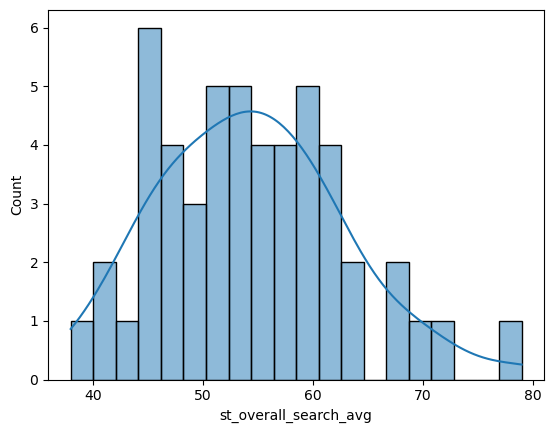

In [249]:
# Create a histogram to see the distribution of state search album averages

sns.histplot(gsearch_state_groups['st_overall_search_avg'], bins=20, kde=True)

In [250]:
gsearch_state_groups['st_overall_search_avg'].describe()

count    51.000000
mean     54.450980
std       8.400747
min      38.000000
25%      48.000000
50%      54.000000
75%      59.500000
max      79.000000
Name: st_overall_search_avg, dtype: float64

In [251]:
# For some reason, all of the state album popularity groups disappeared. Will recreate here.
# Using metrics now that have them grouped by states
# Create a value grouping for st_search_alb_avg, which is each state's average search score for that album

gsearch_state_groups.loc[gsearch_state_groups['st_overall_search_avg'] < 50, 'state alb popularity group'] = 'Low search popularity'

In [252]:
gsearch_state_groups.loc[(gsearch_state_groups['st_overall_search_avg'] >= 50) & (gsearch_state_groups['st_overall_search_avg'] < 58), 'state alb popularity group'] = 'Medium search popularity'

In [253]:
gsearch_state_groups.loc[gsearch_state_groups['st_overall_search_avg'] >= 58, 'state alb popularity group'] = 'High search popularity'

In [254]:
gsearch_state_groups['state alb popularity group'].value_counts(dropna=False)

state alb popularity group
Medium search popularity    19
Low search popularity       16
High search popularity      16
Name: count, dtype: int64

In [255]:
gsearch_state_groups['top_alb_num'].value_counts(dropna=False)

top_alb_num
5     11
1      7
2      6
3      6
13     5
6      5
4      4
14     2
10     1
8      1
7      1
12     1
9      1
Name: count, dtype: int64

In [256]:
gsearch_state_groups.shape # accurate because of 51 state values

(51, 52)

In [257]:
gsearch_state_groups.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming'],
      dtype='object')

In [258]:
gsearch_state_groups.head()

state  state_num  st_overall_search_avg state alb popularity group  \
0     Alabama          1                     52   Medium search popularity   
1      Alaska          2                     46      Low search popularity   
2     Arizona          3                     49      Low search popularity   
3    Arkansas          4                     54   Medium search popularity   
4  California          5                     46      Low search popularity   

   max_gsearch_score st_top_album  top_alb_num  min_gsearch_score  \
0                 93         FEAR            2                  0   
1                100       FEARTV           10                  0   
2                 72         1989            5                  0   
3                 85         1989            5                  0   
4                100      SPEAKTV           13                  2   

  st_lowest_album  low_alb_num  ...   pop_sum  pop_norm  rock_sum  rock_norm  \
0           DEBUT            1  ...  1439.050   287.810      1025     256.25   
1           DEBUT            1  ...  1317.800   263.560       848     212.00   
2           DEBUT            1  ...  1413.975   282.795       942     235.50   
3           DEBUT            1  ...  1496.425   299.285      1061     265.25   
4           DEBUT            1  ...  1397.750   279.550       925     231.25   

   alt_sum  alt_norm  always_ts  originals  taylorsversions  upcoming  
0      487     243.5   1030.250       1346            846.8       433  
1      447     223.5    988.000       1022            866.8       361  
2      524     262.0   1065.375       1111            864.6       388  
3      492     246.0   1042.625       1348            917.8       471  
4      494     247.0   1009.750        911            985.0       339  

[5 rows x 52 columns]

In [259]:
# Aggregate each state's total search score across all periods

tot_st_search_scores = gmerge1234567891011121314.groupby('state')['g_search_score'].sum()

In [260]:
tot_st_search_scores

state
Alabama                 3780
Alaska                  3342
Arizona                 3546
Arkansas                3909
California              3351
Colorado                3921
Connecticut             4584
Delaware                3912
District of Columbia    4965
Florida                 2992
Georgia                 3348
Hawaii                  2785
Idaho                   4107
Illinois                3811
Indiana                 4266
Iowa                    4164
Kansas                  4256
Kentucky                4397
Louisiana               3452
Maine                   4513
Maryland                3511
Massachusetts           5103
Michigan                3986
Minnesota               4388
Mississippi             3250
Missouri                4166
Montana                 3664
Nebraska                4507
Nevada                  2977
New Hampshire           4863
New Jersey              3833
New Mexico              3146
New York                3428
North Carolina          3760
North Da

In [261]:
# Check df shape
tot_st_search_scores.shape

(51,)

In [262]:
# Check larger shape
gsearch_state_groups.shape

(51, 52)

In [263]:
# Merge total google score dataframe with larger state group df

statesg = pd.merge(gsearch_state_groups, tot_st_search_scores, on='state', how='left')

In [264]:
# Check df shape
statesg.shape

(51, 53)

In [265]:
statesg.head()

state  state_num  st_overall_search_avg state alb popularity group  \
0     Alabama          1                     52   Medium search popularity   
1      Alaska          2                     46      Low search popularity   
2     Arizona          3                     49      Low search popularity   
3    Arkansas          4                     54   Medium search popularity   
4  California          5                     46      Low search popularity   

   max_gsearch_score st_top_album  top_alb_num  min_gsearch_score  \
0                 93         FEAR            2                  0   
1                100       FEARTV           10                  0   
2                 72         1989            5                  0   
3                 85         1989            5                  0   
4                100      SPEAKTV           13                  2   

  st_lowest_album  low_alb_num  ...  pop_norm  rock_sum  rock_norm  alt_sum  \
0           DEBUT            1  ...   287.810      1025     256.25      487   
1           DEBUT            1  ...   263.560       848     212.00      447   
2           DEBUT            1  ...   282.795       942     235.50      524   
3           DEBUT            1  ...   299.285      1061     265.25      492   
4           DEBUT            1  ...   279.550       925     231.25      494   

   alt_norm  always_ts  originals  taylorsversions  upcoming  g_search_score  
0     243.5   1030.250       1346            846.8       433            3780  
1     223.5    988.000       1022            866.8       361            3342  
2     262.0   1065.375       1111            864.6       388            3546  
3     246.0   1042.625       1348            917.8       471            3909  
4     247.0   1009.750        911            985.0       339            3351  

[5 rows x 53 columns]

In [266]:
# Rename gsearch column

statesg.rename(columns = {'g_search_score': 'sum_all_searches'}, inplace=True)

In [267]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [268]:
statesg_subsub = statesg[['st_overall_search_avg',
       'max_gsearch_score',
       'MIDN_avg_score', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm']]

In [269]:
statesg_subsub.corr()

st_overall_search_avg  max_gsearch_score  \
st_overall_search_avg               1.000000           0.657140   
max_gsearch_score                   0.657140           1.000000   
MIDN_avg_score                      0.886478           0.524435   
DEBUT_avg_score                     0.359589           0.261020   
DEBUT_sum                           0.359589           0.261020   
FEAR_avg_score                      0.478579           0.407175   
FEAR_sum                            0.478579           0.407175   
SPEAK_avg_score                     0.735288           0.484648   
SPEAK_sum                           0.735288           0.484648   
RED_avg_score                       0.805148           0.478775   
RED_sum                             0.805148           0.478775   
1989_avg_score                      0.804690           0.550329   
1989_sum                            0.804690           0.550329   
REP_avg_score                       0.896139           0.594774   
REP_sum                             0.896139           0.594774   
LOVE_avg_score                      0.892477           0.567641   
LOVE_sum                            0.892477           0.567641   
FOLK_avg_score                      0.811418           0.439842   
FOLK_sum                            0.811418           0.439842   
EVER_avg_score                      0.825173           0.447131   
EVER_sum                            0.825173           0.447131   
FEARTV_avg_score                    0.789236           0.468904   
FEARTV_sum                          0.789236           0.468904   
REDTV_avg_score                     0.854815           0.488140   
REDTV_sum                           0.854815           0.488140   
SPEAKTV_avg_score                   0.493831           0.614537   
SPEAKTV_sum                         0.493831           0.614537   
1989TV_avg_score                    0.659639           0.578057   
MIDN_sum_n                          0.886478           0.524435   
1989TV_sum_n                        0.659639           0.578057   
country_sum                         0.798081           0.567389   
country_norm                        0.798081           0.567389   
pop_sum                             0.972521           0.659380   
pop_norm                            0.972521           0.659380   
rock_sum                            0.959723           0.660593   
rock_norm                           0.959723           0.660593   
alt_sum                             0.838430           0.454396   
alt_norm                            0.838430           0.454396   

                       MIDN_avg_score  DEBUT_avg_score  DEBUT_sum  \
st_overall_search_avg        0.886478         0.359589   0.359589   
max_gsearch_score            0.524435         0.261020   0.261020   
MIDN_avg_score               1.000000         0.096578   0.096578   
DEBUT_avg_score              0.096578         1.000000   1.000000   
DEBUT_sum                    0.096578         1.000000   1.000000   
FEAR_avg_score               0.111730         0.657520   0.657520   
FEAR_sum                     0.111730         0.657520   0.657520   
SPEAK_avg_score              0.431088         0.439276   0.439276   
SPEAK_sum                    0.431088         0.439276   0.439276   
RED_avg_score                0.552900         0.464580   0.464580   
RED_sum                      0.552900         0.464580   0.464580   
1989_avg_score               0.640598         0.277332   0.277332   
1989_sum                     0.640598         0.277332   0.277332   
REP_avg_score                0.871799         0.304052   0.304052   
REP_sum                      0.871799         0.304052   0.304052   
LOVE_avg_score               0.820120         0.246809   0.246809   
LOVE_sum                     0.820120         0.246809   0.246809   
FOLK_avg_score               0.875862         0.001888   0.001888   
FOLK_sum                     0.875862         0.001888   0.001888   
EVER_avg_score               

In [270]:
statesg_genretv_pairings = statesg[['st_overall_search_avg',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']]

In [271]:
statesg_genretv_pairings.corr()

st_overall_search_avg  country_norm  pop_norm  \
st_overall_search_avg               1.000000      0.798081  0.972521   
country_norm                        0.798081      1.000000  0.694364   
pop_norm                            0.972521      0.694364  1.000000   
rock_norm                           0.959723      0.793671  0.903770   
alt_norm                            0.838430      0.434767  0.842720   
always_ts                           0.900770      0.528120  0.910274   
originals                           0.789725      0.882066  0.703902   
taylorsversions                     0.880237      0.544963  0.902202   
upcoming                            0.799539      0.857609  0.763357   
sum_all_searches                    0.999466      0.794844  0.973989   

                       rock_norm  alt_norm  always_ts  originals  \
st_overall_search_avg   0.959723  0.838430   0.900770   0.789725   
country_norm            0.793671  0.434767   0.528120   0.882066   
pop_norm                0.903770  0.842720   0.910274   0.703902   
rock_norm               1.000000  0.726343   0.790354   0.866071   
alt_norm                0.726343  1.000000   0.982039   0.387512   
always_ts               0.790354  0.982039   1.000000   0.477787   
originals               0.866071  0.387512   0.477787   1.000000   
taylorsversions         0.819039  0.873101   0.895897   0.480520   
upcoming                0.740713  0.494387   0.599276   0.733986   
sum_all_searches        0.957326  0.844423   0.905485   0.783070   

                       taylorsversions  upcoming  sum_all_searches  
st_overall_search_avg         0.880237  0.799539          0.999466  
country_norm                  0.544963  0.857609          0.794844  
pop_norm                      0.902202  0.763357          0.973989  
rock_norm                     0.819039  0.740713          0.957326  
alt_norm                      0.873101  0.494387          0.844423  
always_ts                     0.895897  0.599276          0.905485  
originals                     0.480520  0.733986          0.783070  
taylorsversions               1.000000  0.555405          0.886125  
upcoming                      0.555405  1.000000          0.795009  
sum_all_searches              0.886125  0.795009          1.000000

## This is important! States with higher country album search scores have the weakest relationship with taylor's verisions as compared to all the other genre groups. Pop has a very strong correlation with taylor's versions

### Hypothesis for predictive analy: using country vs. pop scores to predict DebutTV and reputationTV scores

### Curious about if country vs. pop search score states have correlation with week 1 album sales measures

In [272]:
statesg_country_sorted =  statesg[['state', 'st_overall_search_avg',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']].sort_values(by='country_norm', ascending=False)

In [273]:
statesg_country_sorted

state  st_overall_search_avg  country_norm  pop_norm  \
39          Rhode Island                     79    305.333333   444.245   
27              Nebraska                     62    291.333333   342.685   
42             Tennessee                     62    279.666667   349.940   
48         West Virginia                     56    275.333333   293.940   
44                  Utah                     71    274.333333   408.540   
34          North Dakota                     57    273.000000   329.380   
19                 Maine                     62    272.333333   334.890   
15                  Iowa                     57    267.000000   321.260   
16                Kansas                     59    265.666667   334.390   
29         New Hampshire                     67    263.333333   350.340   
17              Kentucky                     61    260.000000   336.635   
38          Pennsylvania                     63    257.666667   346.905   
21         Massachusetts                     70    251.333333   396.545   
6            Connecticut                     63    251.333333   346.565   
12                 Idaho                     57    247.333333   316.760   
22              Michigan                     55    245.000000   297.515   
35                  Ohio                     59    244.000000   320.090   
3               Arkansas                     54    243.333333   299.285   
41          South Dakota                     55    242.666667   324.745   
23             Minnesota                     60    242.666667   335.750   
49             Wisconsin                     56    239.333333   307.695   
14               Indiana                     59    237.000000   334.720   
0                Alabama                     52    235.000000   287.810   
40        South Carolina                     52    230.666667   286.255   
33        North Carolina                     52    230.333333   285.905   
18             Louisiana                     47    228.000000   266.175   
36              Oklahoma                     52    220.333333   293.990   
7               Delaware                     54    216.666667   296.435   
45               Vermont                     60    216.666667   347.225   
25              Missouri                     57    214.333333   347.670   
8   District of Columbia                     68    211.000000   403.845   
50               Wyoming                     45    210.000000   249.320   
1                 Alaska                     46    208.333333   263.560   
10               Georgia                     46    205.666667   260.470   
24           Mississippi                     45    200.000000   260.180   
13              Illinois                     52    197.000000   307.380   
31            New Mexico                     43    195.666667   252.785   
26               Montana                     50    194.666667   288.660   
5               Colorado                     54    192.666667   314.655   
43                 Texas                     45    192.000000   261.390   
46              Virginia                     48    187.666667   273.635   
30            New Jersey                     53    187.333333   304.310   
47            Washington                     53    187.000000   303.915   
37                Oregon                     49    186.333333   265.445   
2                Arizona                     49    183.000000   282.795   
20              Maryland                     48    181.333333   278.755   
32              New York                     47    167.333333   282.190   
9                Florida                     41    151.333333   245.315   
28                Nevada                     41    150.666667   240.155   
4             California                     46    142.666667   279.550   
11                Hawaii                     38    106.000000   237.910   

    rock_norm  alt_norm  always_ts  originals  taylorsversions  upcoming  \
39     383.50     421.0   1747.625       1

In [274]:
statesg_pop_sorted =  statesg[['state', 'st_overall_search_avg',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']].sort_values(by='pop_norm', ascending=False)

In [275]:
statesg_pop_sorted

state  st_overall_search_avg  country_norm  pop_norm  \
39          Rhode Island                     79    305.333333   444.245   
44                  Utah                     71    274.333333   408.540   
8   District of Columbia                     68    211.000000   403.845   
21         Massachusetts                     70    251.333333   396.545   
29         New Hampshire                     67    263.333333   350.340   
42             Tennessee                     62    279.666667   349.940   
25              Missouri                     57    214.333333   347.670   
45               Vermont                     60    216.666667   347.225   
38          Pennsylvania                     63    257.666667   346.905   
6            Connecticut                     63    251.333333   346.565   
27              Nebraska                     62    291.333333   342.685   
17              Kentucky                     61    260.000000   336.635   
23             Minnesota                     60    242.666667   335.750   
19                 Maine                     62    272.333333   334.890   
14               Indiana                     59    237.000000   334.720   
16                Kansas                     59    265.666667   334.390   
34          North Dakota                     57    273.000000   329.380   
41          South Dakota                     55    242.666667   324.745   
15                  Iowa                     57    267.000000   321.260   
35                  Ohio                     59    244.000000   320.090   
12                 Idaho                     57    247.333333   316.760   
5               Colorado                     54    192.666667   314.655   
49             Wisconsin                     56    239.333333   307.695   
13              Illinois                     52    197.000000   307.380   
30            New Jersey                     53    187.333333   304.310   
47            Washington                     53    187.000000   303.915   
3               Arkansas                     54    243.333333   299.285   
22              Michigan                     55    245.000000   297.515   
7               Delaware                     54    216.666667   296.435   
36              Oklahoma                     52    220.333333   293.990   
48         West Virginia                     56    275.333333   293.940   
26               Montana                     50    194.666667   288.660   
0                Alabama                     52    235.000000   287.810   
40        South Carolina                     52    230.666667   286.255   
33        North Carolina                     52    230.333333   285.905   
2                Arizona                     49    183.000000   282.795   
32              New York                     47    167.333333   282.190   
4             California                     46    142.666667   279.550   
20              Maryland                     48    181.333333   278.755   
46              Virginia                     48    187.666667   273.635   
18             Louisiana                     47    228.000000   266.175   
37                Oregon                     49    186.333333   265.445   
1                 Alaska                     46    208.333333   263.560   
43                 Texas                     45    192.000000   261.390   
10               Georgia                     46    205.666667   260.470   
24           Mississippi                     45    200.000000   260.180   
31            New Mexico                     43    195.666667   252.785   
50               Wyoming                     45    210.000000   249.320   
9                Florida                     41    151.333333   245.315   
28                Nevada                     41    150.666667   240.155   
11                Hawaii                     38    106.000000   237.910   

    rock_norm  alt_norm  always_ts  originals  taylorsversions  upcoming  \
39     383.50     421.0   1747.625       1

In [276]:
statesg_ogs_sorted =  statesg[['state', 'st_overall_search_avg',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']].sort_values(by='originals', ascending=False)

In [277]:
statesg_ogs_sorted

state  st_overall_search_avg  country_norm  pop_norm  \
39          Rhode Island                     79    305.333333   444.245   
29         New Hampshire                     67    263.333333   350.340   
41          South Dakota                     55    242.666667   324.745   
17              Kentucky                     61    260.000000   336.635   
44                  Utah                     71    274.333333   408.540   
38          Pennsylvania                     63    257.666667   346.905   
27              Nebraska                     62    291.333333   342.685   
14               Indiana                     59    237.000000   334.720   
19                 Maine                     62    272.333333   334.890   
6            Connecticut                     63    251.333333   346.565   
42             Tennessee                     62    279.666667   349.940   
7               Delaware                     54    216.666667   296.435   
34          North Dakota                     57    273.000000   329.380   
48         West Virginia                     56    275.333333   293.940   
21         Massachusetts                     70    251.333333   396.545   
15                  Iowa                     57    267.000000   321.260   
16                Kansas                     59    265.666667   334.390   
35                  Ohio                     59    244.000000   320.090   
22              Michigan                     55    245.000000   297.515   
40        South Carolina                     52    230.666667   286.255   
3               Arkansas                     54    243.333333   299.285   
0                Alabama                     52    235.000000   287.810   
49             Wisconsin                     56    239.333333   307.695   
36              Oklahoma                     52    220.333333   293.990   
12                 Idaho                     57    247.333333   316.760   
30            New Jersey                     53    187.333333   304.310   
25              Missouri                     57    214.333333   347.670   
33        North Carolina                     52    230.333333   285.905   
23             Minnesota                     60    242.666667   335.750   
24           Mississippi                     45    200.000000   260.180   
18             Louisiana                     47    228.000000   266.175   
45               Vermont                     60    216.666667   347.225   
26               Montana                     50    194.666667   288.660   
2                Arizona                     49    183.000000   282.795   
20              Maryland                     48    181.333333   278.755   
43                 Texas                     45    192.000000   261.390   
13              Illinois                     52    197.000000   307.380   
8   District of Columbia                     68    211.000000   403.845   
10               Georgia                     46    205.666667   260.470   
32              New York                     47    167.333333   282.190   
47            Washington                     53    187.000000   303.915   
5               Colorado                     54    192.666667   314.655   
50               Wyoming                     45    210.000000   249.320   
1                 Alaska                     46    208.333333   263.560   
28                Nevada                     41    150.666667   240.155   
31            New Mexico                     43    195.666667   252.785   
9                Florida                     41    151.333333   245.315   
4             California                     46    142.666667   279.550   
37                Oregon                     49    186.333333   265.445   
46              Virginia                     48    187.666667   273.635   
11                Hawaii                     38    106.000000   237.910   

    rock_norm  alt_norm  always_ts  originals  taylorsversions  upcoming  \
39     383.50     421.0   1747.625       1

In [278]:
statesg_tvs_sorted =  statesg[['state', 'st_overall_search_avg',
       'country_norm', 'pop_norm', 'rock_norm', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']].sort_values(by='taylorsversions', ascending=False)

In [279]:
statesg_tvs_sorted

state  st_overall_search_avg  country_norm  pop_norm  \
8   District of Columbia                     68    211.000000   403.845   
21         Massachusetts                     70    251.333333   396.545   
39          Rhode Island                     79    305.333333   444.245   
44                  Utah                     71    274.333333   408.540   
23             Minnesota                     60    242.666667   335.750   
45               Vermont                     60    216.666667   347.225   
16                Kansas                     59    265.666667   334.390   
25              Missouri                     57    214.333333   347.670   
38          Pennsylvania                     63    257.666667   346.905   
29         New Hampshire                     67    263.333333   350.340   
6            Connecticut                     63    251.333333   346.565   
35                  Ohio                     59    244.000000   320.090   
5               Colorado                     54    192.666667   314.655   
19                 Maine                     62    272.333333   334.890   
47            Washington                     53    187.000000   303.915   
27              Nebraska                     62    291.333333   342.685   
14               Indiana                     59    237.000000   334.720   
15                  Iowa                     57    267.000000   321.260   
17              Kentucky                     61    260.000000   336.635   
13              Illinois                     52    197.000000   307.380   
12                 Idaho                     57    247.333333   316.760   
42             Tennessee                     62    279.666667   349.940   
49             Wisconsin                     56    239.333333   307.695   
37                Oregon                     49    186.333333   265.445   
48         West Virginia                     56    275.333333   293.940   
41          South Dakota                     55    242.666667   324.745   
4             California                     46    142.666667   279.550   
34          North Dakota                     57    273.000000   329.380   
46              Virginia                     48    187.666667   273.635   
30            New Jersey                     53    187.333333   304.310   
22              Michigan                     55    245.000000   297.515   
26               Montana                     50    194.666667   288.660   
7               Delaware                     54    216.666667   296.435   
50               Wyoming                     45    210.000000   249.320   
33        North Carolina                     52    230.333333   285.905   
3               Arkansas                     54    243.333333   299.285   
36              Oklahoma                     52    220.333333   293.990   
20              Maryland                     48    181.333333   278.755   
1                 Alaska                     46    208.333333   263.560   
2                Arizona                     49    183.000000   282.795   
32              New York                     47    167.333333   282.190   
40        South Carolina                     52    230.666667   286.255   
0                Alabama                     52    235.000000   287.810   
43                 Texas                     45    192.000000   261.390   
18             Louisiana                     47    228.000000   266.175   
10               Georgia                     46    205.666667   260.470   
11                Hawaii                     38    106.000000   237.910   
9                Florida                     41    151.333333   245.315   
31            New Mexico                     43    195.666667   252.785   
28                Nevada                     41    150.666667   240.155   
24           Mississippi                     45    200.000000   260.180   

    rock_norm  alt_norm  always_ts  originals  taylorsversions  upcoming  \
8      299.25     435.5   1747.625       1

## Hypoth? The higher a state's pop album search score, the higher a state's sum of scores for Taylor's versions.

## The higher difference between the average score for fearless v

In [280]:
checck_avgs = statesg[['st_overall_search_avg',
       'max_gsearch_score',
       'MIDN_avg_score', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm']]

## Review top country state scores for hypothesis focus

States that have higher average album search scores attached to periods for country albums from 2006-2023 will have a lower average album search score for periods for the Midnights, 1989TV and reputation albums as compared to states with lower search scores for country albums from the same periods. o*Need to add specific metrics vs. just “higher” oNull hypothesis: States that have higher average album search scores attached to periods for country albums from 2006-2023 will have a higher or equal average album search score for periods for the Midnights, 1989TV and reputation albums as compared to states with lower search scores for country albums from the same periods.

*Perhaps want to change to TOTAL search score that is a sum, normalized

If state x has a higher normalized search score (sum) than state y for country albums (Debut, Fearless, Speak Now), then state x will have a lower normalized search score sum for her recent pop albums (reputation, Midnights, and 1989TV).

OR 

The higher a state's normalized search score for the country albums "Fearless", the lower its normalized search score sum for her recent original pop album "Midnights" will be. 

In [281]:
statesg.head()

state  state_num  st_overall_search_avg state alb popularity group  \
0     Alabama          1                     52   Medium search popularity   
1      Alaska          2                     46      Low search popularity   
2     Arizona          3                     49      Low search popularity   
3    Arkansas          4                     54   Medium search popularity   
4  California          5                     46      Low search popularity   

   max_gsearch_score st_top_album  top_alb_num  min_gsearch_score  \
0                 93         FEAR            2                  0   
1                100       FEARTV           10                  0   
2                 72         1989            5                  0   
3                 85         1989            5                  0   
4                100      SPEAKTV           13                  2   

  st_lowest_album  low_alb_num  ...  pop_norm  rock_sum  rock_norm  alt_sum  \
0           DEBUT            1  ...   287.810      1025     256.25      487   
1           DEBUT            1  ...   263.560       848     212.00      447   
2           DEBUT            1  ...   282.795       942     235.50      524   
3           DEBUT            1  ...   299.285      1061     265.25      492   
4           DEBUT            1  ...   279.550       925     231.25      494   

   alt_norm  always_ts  originals  taylorsversions  upcoming  sum_all_searches  
0     243.5   1030.250       1346            846.8       433              3780  
1     223.5    988.000       1022            866.8       361              3342  
2     262.0   1065.375       1111            864.6       388              3546  
3     246.0   1042.625       1348            917.8       471              3909  
4     247.0   1009.750        911            985.0       339              3351  

[5 rows x 53 columns]

In [282]:
# Subset to start to explore this relationship prior to map

genre_hypoth = statesg[['state', 'st_overall_search_avg', 'FEARTV_avg_score', 'FEARTV_sum', 'MIDN_avg_score', 'MIDN_sum_n','st_top_album']] 

In [283]:
genre_hypoth

state  st_overall_search_avg  FEARTV_avg_score  FEARTV_sum  \
0                Alabama                     52              48.6         243   
1                 Alaska                     46              62.0         310   
2                Arizona                     49              51.6         258   
3               Arkansas                     54              47.4         237   
4             California                     46              51.6         258   
5               Colorado                     54              57.2         286   
6            Connecticut                     63              76.4         382   
7               Delaware                     54              50.8         254   
8   District of Columbia                     68              85.0         425   
9                Florida                     41              40.8         204   
10               Georgia                     46              46.8         234   
11                Hawaii                     38              39.4         197   
12                 Idaho                     57              58.2         291   
13              Illinois                     52              58.0         290   
14               Indiana                     59              58.4         292   
15                  Iowa                     57              59.6         298   
16                Kansas                     59              52.8         264   
17              Kentucky                     61              51.6         258   
18             Louisiana                     47              43.6         218   
19                 Maine                     62              71.2         356   
20              Maryland                     48              57.0         285   
21         Massachusetts                     70              86.8         434   
22              Michigan                     55              51.4         257   
23             Minnesota                     60              63.2         316   
24           Mississippi                     45              37.4         187   
25              Missouri                     57              51.0         255   
26               Montana                     50              49.0         245   
27              Nebraska                     62              57.2         286   
28                Nevada                     41              38.0         190   
29         New Hampshire                     67              72.0         360   
30            New Jersey                     53              55.4         277   
31            New Mexico                     43              48.6         243   
32              New York                     47              50.6         253   
33        North Carolina                     52              53.0         265   
34          North Dakota                     57              46.6         233   
35                  Ohio                     59              53.0         265   
36              Oklahoma                     52              50.8         254   
37                Oregon                     49              62.4         312   
38          Pennsylvania                     63              62.4         312   
39          Rhode Island                     79              81.4         407   
40        South Carolina                     52              46.6         233   
41          South Dakota                     55              52.2         261   
42             Tennessee                     62              60.4         302   
43                 Texas                     45              45.4         227   
44                  Utah                     71              78.0         390   
45               Vermont                     60              79.8         399   
46              Virginia                     48              61.0         305   
47            Washington                     53              59.4         297   
48         West Virginia                     56   

Observations: Overall, Taylor tends to show higher average search scores for Midnights. This could show the increase in popularity since the measure is about google searches. Time seems to be a major factor here. 

In [284]:
genre_hypoth_num = genre_hypoth.select_dtypes(include='number')

In [285]:
genre_hypoth_num.corr()

st_overall_search_avg  FEARTV_avg_score  FEARTV_sum  \
st_overall_search_avg               1.000000          0.789236    0.789236   
FEARTV_avg_score                    0.789236          1.000000    1.000000   
FEARTV_sum                          0.789236          1.000000    1.000000   
MIDN_avg_score                      0.886478          0.881931    0.881931   
MIDN_sum_n                          0.886478          0.881931    0.881931   

                       MIDN_avg_score  MIDN_sum_n  
st_overall_search_avg        0.886478    0.886478  
FEARTV_avg_score             0.881931    0.881931  
FEARTV_sum                   0.881931    0.881931  
MIDN_avg_score               1.000000    1.000000  
MIDN_sum_n                   1.000000    1.000000

This shows a very strong correlation in scores across these two albums. It is interesting that Midnights figurs are more correlating with states overall scores. 

In [286]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [287]:
# Make another subset with genre based measures

genre_hypoth2 = statesg[['state', 'st_overall_search_avg', 'state alb popularity group', 'st_top_album', 'max_gsearch_score', 'country_norm', 'pop_norm', 'rock_norm',
       'alt_norm','st_top_album']] 

In [288]:
genre_hypoth2

state  st_overall_search_avg state alb popularity group  \
0                Alabama                     52   Medium search popularity   
1                 Alaska                     46      Low search popularity   
2                Arizona                     49      Low search popularity   
3               Arkansas                     54   Medium search popularity   
4             California                     46      Low search popularity   
5               Colorado                     54   Medium search popularity   
6            Connecticut                     63     High search popularity   
7               Delaware                     54   Medium search popularity   
8   District of Columbia                     68     High search popularity   
9                Florida                     41      Low search popularity   
10               Georgia                     46      Low search popularity   
11                Hawaii                     38      Low search popularity   
12                 Idaho                     57   Medium search popularity   
13              Illinois                     52   Medium search popularity   
14               Indiana                     59     High search popularity   
15                  Iowa                     57   Medium search popularity   
16                Kansas                     59     High search popularity   
17              Kentucky                     61     High search popularity   
18             Louisiana                     47      Low search popularity   
19                 Maine                     62     High search popularity   
20              Maryland                     48      Low search popularity   
21         Massachusetts                     70     High search popularity   
22              Michigan                     55   Medium search popularity   
23             Minnesota                     60     High search popularity   
24           Mississippi                     45      Low search popularity   
25              Missouri                     57   Medium search popularity   
26               Montana                     50   Medium search popularity   
27              Nebraska                     62     High search popularity   
28                Nevada                     41      Low search popularity   
29         New Hampshire                     67     High search popularity   
30            New Jersey                     53   Medium search popularity   
31            New Mexico                     43      Low search popularity   
32              New York                     47      Low search popularity   
33        North Carolina                     52   Medium search popularity   
34          North Dakota                     57   Medium search popularity   
35                  Ohio                     59     High search popularity   
36              Oklahoma                     52   Medium search popularity   
37                Oregon                     49      Low search popularity   
38          Pennsylvania                     63     High search popularity   
39          Rhode Island                     79     High search popularity   
40        South Carolina                     52   Medium search popularity   
41          South Dakota                     55   Medium search popularity   
42             Tennessee                     62     High search popularity   
43                 Texas                     45      Low search popularity   
44                  Utah                     71     High search popularity   
45               Vermont                     60     High search popularity   
46              Virginia                     48      Low search popularity   
47            Washington                     53   Medium search popularity   
48         West Virginia                     56   Medium search popularity   
49             Wisconsin                     56   Medium search popularity   
50               Wyoming                 

Search popularity group appears inaccurate

In [289]:
statesg['state alb popularity group'].value_counts (dropna=False)

state alb popularity group
Medium search popularity    19
Low search popularity       16
High search popularity      16
Name: count, dtype: int64

<Axes: xlabel='st_overall_search_avg', ylabel='Count'>

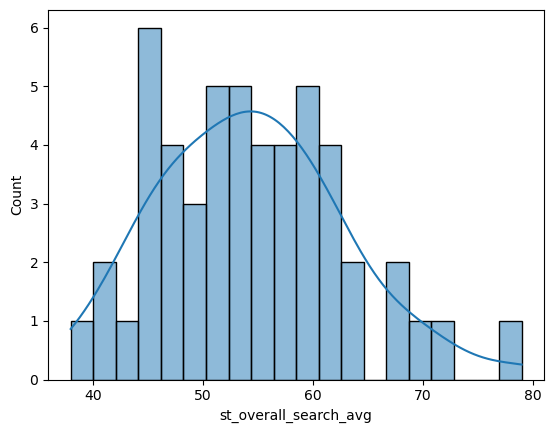

In [290]:
# Fix isue
# Show distribution of variables to see accurate value groupiings 

sns.histplot(statesg['st_overall_search_avg'], bins=20, kde = True) 

In [291]:
statesg['st_overall_search_avg'].describe()

count    51.000000
mean     54.450980
std       8.400747
min      38.000000
25%      48.000000
50%      54.000000
75%      59.500000
max      79.000000
Name: st_overall_search_avg, dtype: float64

## Cleaning: consistency checks

In [292]:
statesg.shape

(51, 53)

In [293]:
statesg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       51 non-null     object 
 1   state_num                   51 non-null     int64  
 2   st_overall_search_avg       51 non-null     int64  
 3   state alb popularity group  51 non-null     object 
 4   max_gsearch_score           51 non-null     int64  
 5   st_top_album                51 non-null     object 
 6   top_alb_num                 51 non-null     int64  
 7   min_gsearch_score           51 non-null     int64  
 8   st_lowest_album             51 non-null     object 
 9   low_alb_num                 51 non-null     int64  
 10  MIDN_avg_score              51 non-null     float64
 11  MIDN_sum_not_norm           51 non-null     int64  
 12  DEBUT_avg_score             51 non-null     float64
 13  DEBUT_sum                   51 non-nu

### Data types

In [294]:
# Convert all of the recording group values to int
# originals and upcoming accurate, need to change always_ts and taylorsversions

statesg['always_ts'] = statesg['always_ts'].astype(int)

In [295]:
statesg['taylorsversions'] = statesg['taylorsversions'].astype(int)

In [296]:
# Need to convert all sums to integers
# 'pop_sum' 'MIDN_sum_n' '1989TV_sum_n'

statesg['pop_sum'] = statesg['pop_sum'].astype(int)

In [297]:
statesg['MIDN_sum_n'] = statesg['MIDN_sum_n'].astype(int)

In [298]:
statesg['1989TV_sum_n'] = statesg['1989TV_sum_n'].astype(int)

In [299]:
statesg.dtypes

state                          object
state_num                       int64
st_overall_search_avg           int64
state alb popularity group     object
max_gsearch_score               int64
st_top_album                   object
top_alb_num                     int64
min_gsearch_score               int64
st_lowest_album                object
low_alb_num                     int64
MIDN_avg_score                float64
MIDN_sum_not_norm               int64
DEBUT_avg_score               float64
DEBUT_sum                       int64
FEAR_avg_score                float64
FEAR_sum                        int64
SPEAK_avg_score               float64
SPEAK_sum                       int64
RED_avg_score                 float64
RED_sum                         int64
1989_avg_score                float64
1989_sum                        int64
REP_avg_score                 float64
REP_sum                         int64
LOVE_avg_score                float64
LOVE_sum                        int64
FOLK_avg_sco

#### Missing values

In [300]:
# Check for missing values

statesg.isnull().sum()  # none found

state                         0
state_num                     0
st_overall_search_avg         0
state alb popularity group    0
max_gsearch_score             0
st_top_album                  0
top_alb_num                   0
min_gsearch_score             0
st_lowest_album               0
low_alb_num                   0
MIDN_avg_score                0
MIDN_sum_not_norm             0
DEBUT_avg_score               0
DEBUT_sum                     0
FEAR_avg_score                0
FEAR_sum                      0
SPEAK_avg_score               0
SPEAK_sum                     0
RED_avg_score                 0
RED_sum                       0
1989_avg_score                0
1989_sum                      0
REP_avg_score                 0
REP_sum                       0
LOVE_avg_score                0
LOVE_sum                      0
FOLK_avg_score                0
FOLK_sum                      0
EVER_avg_score                0
EVER_sum                      0
FEARTV_avg_score              0
FEARTV_s

#### Duplicates check

In [301]:
# Check for duplicates

statesg_dups = statesg.duplicated()

In [302]:
statesg_dups.shape  # No dups

(51,)

In [303]:
statesg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       51 non-null     object 
 1   state_num                   51 non-null     int64  
 2   st_overall_search_avg       51 non-null     int64  
 3   state alb popularity group  51 non-null     object 
 4   max_gsearch_score           51 non-null     int64  
 5   st_top_album                51 non-null     object 
 6   top_alb_num                 51 non-null     int64  
 7   min_gsearch_score           51 non-null     int64  
 8   st_lowest_album             51 non-null     object 
 9   low_alb_num                 51 non-null     int64  
 10  MIDN_avg_score              51 non-null     float64
 11  MIDN_sum_not_norm           51 non-null     int64  
 12  DEBUT_avg_score             51 non-null     float64
 13  DEBUT_sum                   51 non-nu

#### Extreme values check

<Axes: xlabel='st_overall_search_avg', ylabel='Count'>

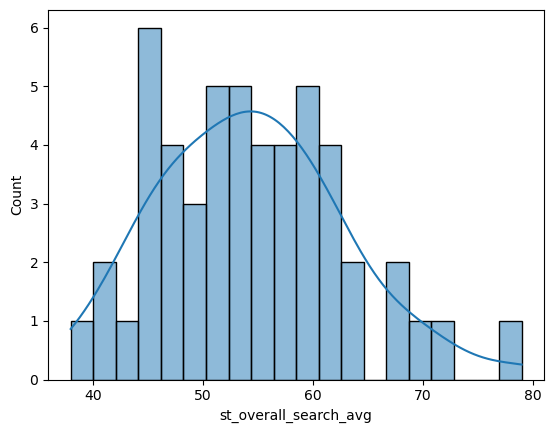

In [304]:
# Show distribution of variables to plot- st_overall_search_avg

sns.histplot(statesg['st_overall_search_avg'], bins=20, kde = True) 

<Axes: xlabel='sum_all_searches', ylabel='Count'>

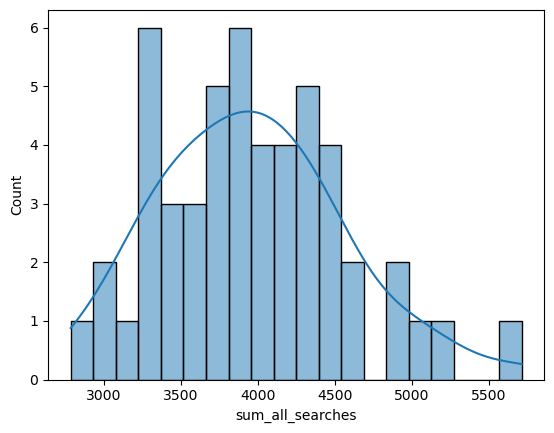

In [305]:
# Show distribution of variables to plot- sum_all_searches

sns.histplot(statesg['sum_all_searches'], bins=20, kde = True) 

In [306]:
sorted_state_taylor_pop = statesg.sort_values(by='sum_all_searches', ascending=False)

In [307]:
sorted_state_taylor_pop

state  state_num  st_overall_search_avg  \
39          Rhode Island         40                     79   
44                  Utah         45                     71   
21         Massachusetts         22                     70   
8   District of Columbia          9                     68   
29         New Hampshire         30                     67   
6            Connecticut          7                     63   
38          Pennsylvania         39                     63   
19                 Maine         20                     62   
27              Nebraska         28                     62   
42             Tennessee         43                     62   
17              Kentucky         18                     61   
23             Minnesota         24                     60   
45               Vermont         46                     60   
14               Indiana         15                     59   
35                  Ohio         36                     59   
16                Kansas         17                     59   
25              Missouri         26                     57   
15                  Iowa         16                     57   
34          North Dakota         35                     57   
12                 Idaho         13                     57   
48         West Virginia         49                     56   
49             Wisconsin         50                     56   
41          South Dakota         42                     55   
22              Michigan         23                     55   
5               Colorado          6                     54   
7               Delaware          8                     54   
3               Arkansas          4                     54   
47            Washington         48                     53   
30            New Jersey         31                     53   
13              Illinois         14                     52   
36              Oklahoma         37                     52   
0                Alabama          1                     52   
33        North Carolina         34                     52   
40        South Carolina         41                     52   
26               Montana         27                     50   
37                Oregon         38                     49   
2                Arizona          3                     49   
46              Virginia         47                     48   
20              Maryland         21                     48   
18             Louisiana         19                     47   
32              New York         33                     47   
4             California          5                     46   
10               Georgia         11                     46   
1                 Alaska          2                     46   
43                 Texas         44                     45   
50               Wyoming         51                     45   
24           Mississippi         25                     45   
31            New Mexico         32                     43   
9                Florida         10                     41   
28                Nevada         29                     41   
11                Hawaii         12                     38   

   state alb popularity group  max_gsearch_score st_top_album  top_alb_num  \
39     High search popularity                100        DEBUT            1   
44     High search popularity                100         1989            5   
21     High search popularity                100          REP            6   
8      High search popularity                100          REP            6   
29     High search popularity                100          RED            4   
6      High search popularity                 90         1989            5   
38     High search popularity                 93          RED            4   
19     High search popularity                100        SPEAK            3   
27     High search popularity                100         FEAR            2   
42     High se

<Axes: xlabel='top_alb_num', ylabel='Count'>

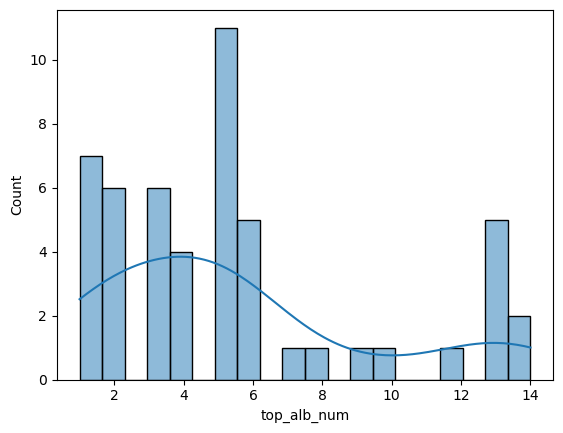

In [308]:
# Show distribution of variables to plot- top_alb_num (number represents an album, not a value)

sns.histplot(statesg['top_alb_num'], bins=20, kde = True) 

## This is an important distribution because it differs from measures such as Spotify streams and album sales in that it shows clear regional differences in favorite album by state

<Axes: xlabel='low_alb_num', ylabel='Count'>

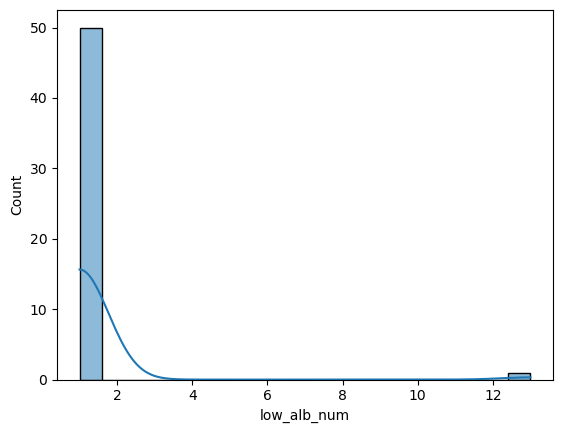

In [309]:
# Show distribution of variables to plot- low_alb_num (this represents the album)

sns.histplot(statesg['low_alb_num'], bins=20, kde = True) 

Note: bottom album was Debut almost across the board. Went into more specifics by adding many columns that each have album comparisons. 

<Axes: xlabel='country_norm', ylabel='Count'>

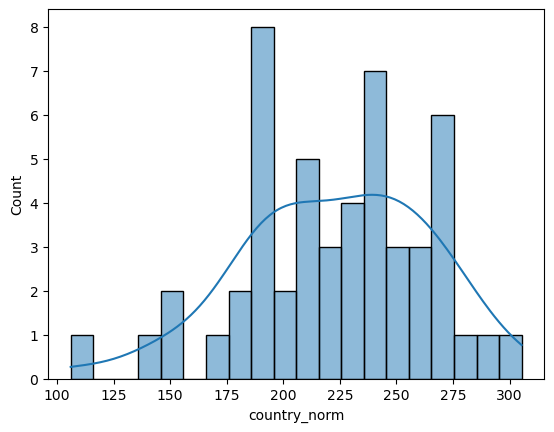

In [310]:
# Show distribution of variables to plot- country_norm

sns.histplot(statesg['country_norm'], bins=20, kde = True) 

<Axes: xlabel='rock_norm', ylabel='Count'>

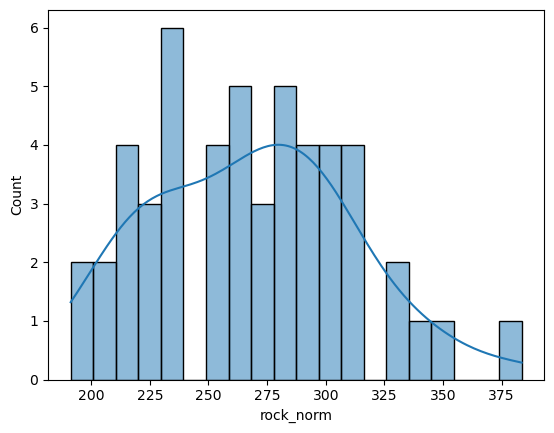

In [311]:
# Show distribution of variables to plot- rock_norm

sns.histplot(statesg['rock_norm'], bins=20, kde = True) 

<Axes: xlabel='alt_norm', ylabel='Count'>

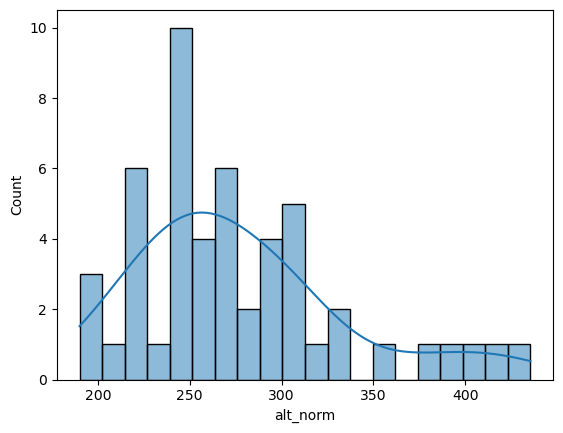

In [312]:
# Show distribution of variables to plot- alt_norm

sns.histplot(statesg['alt_norm'], bins=20, kde = True) 

<Axes: xlabel='pop_norm', ylabel='Count'>

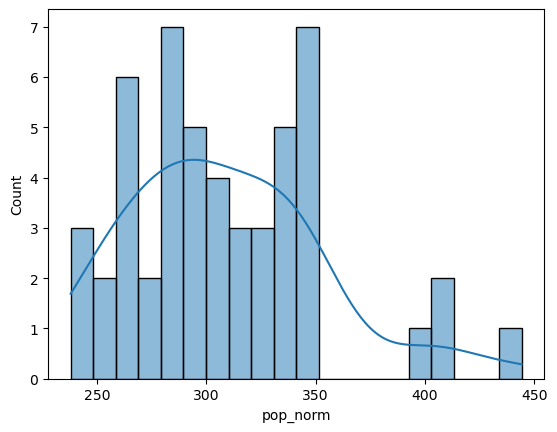

In [313]:
# Show distribution of variables to plot- pop_norm

sns.histplot(statesg['pop_norm'], bins=20, kde = True) 

<Axes: xlabel='always_ts', ylabel='Count'>

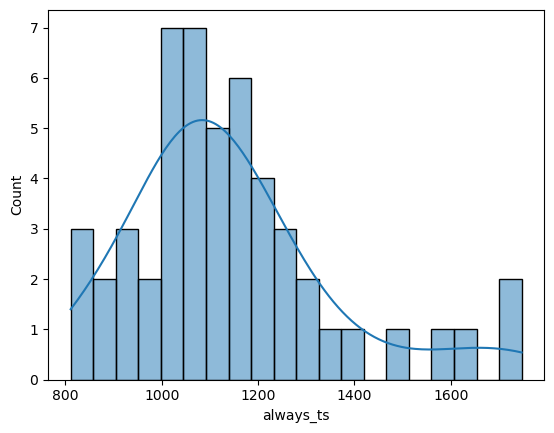

In [314]:
# Show distribution of variables to plot- always_ts

sns.histplot(statesg['always_ts'], bins=20, kde = True) 

<Axes: xlabel='originals', ylabel='Count'>

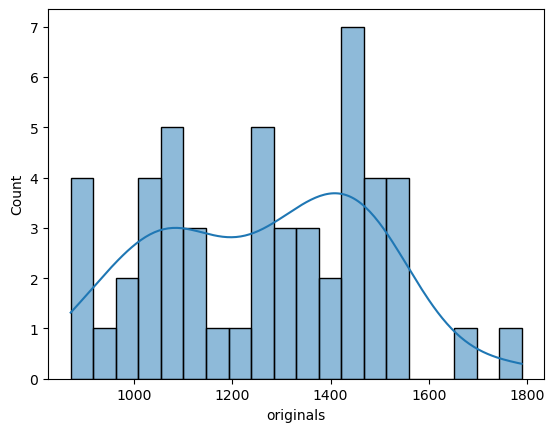

In [315]:
# Show distribution of variables to plot- originals

sns.histplot(statesg['originals'], bins=20, kde = True) 

<Axes: xlabel='taylorsversions', ylabel='Count'>

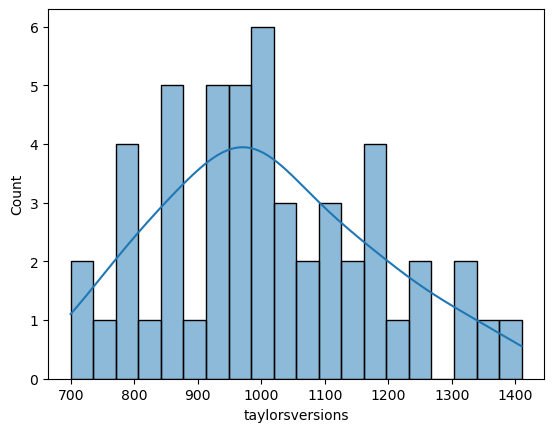

In [316]:
# Show distribution of variables to plot- taylorsversions

sns.histplot(statesg['taylorsversions'], bins=20, kde = True) 

### Variable definition reminder
### Interest by region (0 to 100 score)
See in which location your term was most popular during the specified time frame. Values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.
Note: A higher value means a higher proportion of all queries, not a higher absolute query count. So a tiny country where 80% of the queries are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".

# Plotting choropleth with folium

## Top Album number (album)

In [317]:
# Create a data frame with just the states and the values: top album number (shows album preference)

data_top_alb_num = statesg[['state','top_alb_num']]
data_top_alb_num.head()

state  top_alb_num
0     Alabama            2
1      Alaska           10
2     Arizona            5
3    Arkansas            5
4  California           13

In [318]:
# top album map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_top_alb_num,
    columns = ['state','top_alb_num'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

This is very insightful. One question I have been wondering about is if her fan base for earlier albums is more conservative and for later albums more liberal. This map hints that there could be a relationship based on state's regional preferences.

##  Overall state search scores

In [319]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [320]:
# Create a data frame with just the states and the values: overall search info

data_overall = statesg[['state','st_overall_search_avg', 'sum_all_searches']]
data_overall.head()

state  st_overall_search_avg  sum_all_searches
0     Alabama                     52              3780
1      Alaska                     46              3342
2     Arizona                     49              3546
3    Arkansas                     54              3909
4  California                     46              3351

In [321]:
# country a search average score map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_overall,
    columns = ['state','st_overall_search_avg'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [322]:
# country a total sum of search scores map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_overall,
    columns = ['state','sum_all_searches'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

## Genre
### Based on my hypothesis about genre shifts

In [323]:
# Create a data frame with just the states and the values: genre

data_genre = statesg[['state','country_norm', 'pop_norm', 'rock_norm','alt_norm']]
data_genre.head()

state  country_norm  pop_norm  rock_norm  alt_norm
0     Alabama    235.000000   287.810     256.25     243.5
1      Alaska    208.333333   263.560     212.00     223.5
2     Arizona    183.000000   282.795     235.50     262.0
3    Arkansas    243.333333   299.285     265.25     246.0
4  California    142.666667   279.550     231.25     247.0

In [324]:
# country genre map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_genre,
    columns = ['state','country_norm'],
    key_on = 'feature.properties.name', 
    fill_color = 'OrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [325]:
# pop genre map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_genre,
    columns = ['state','pop_norm'],
    key_on = 'feature.properties.name', 
    fill_color = 'PuBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [326]:
# rock genre map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_genre,
    columns = ['state','rock_norm'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [327]:
# alt genre map
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_genre,
    columns = ['state','alt_norm'],
    key_on = 'feature.properties.name', 
    fill_color = 'BuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

## Create a layered choropleth map of all genres

In [328]:
# Map for all genres with layers

# Create base map
m_genres = folium.Map(location=[0, 0], zoom_start=2)

# Function to add Choropleth layer to the map
def add_choropleth_layer(map_object, data, geojson, variable_column, name, color):
    choropleth_layer = folium.Choropleth(
        geo_data=state_geo,
        data=data,
        columns=['state', variable_column],
        key_on='feature.properties.name',
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'{name} search sum',
        name=name,
        highlight=True,
    ).add_to(map_object)
    
    return choropleth_layer


# Add Choropleth layers to the map with names and colors
layer1 = add_choropleth_layer(m_genres, data_genre, state_geo, 'country_norm', 'Country Search Score', 'PuBuGn')
layer2 = add_choropleth_layer(m_genres, data_genre, state_geo, 'rock_norm', 'Rock Search Score', 'YlOrBr')
layer3 = add_choropleth_layer(m_genres, data_genre, state_geo, 'alt_norm', 'Alternative Search Score', 'YlGnBu')
layer4 = add_choropleth_layer(m_genres, data_genre, state_geo, 'pop_norm', 'Pop Search Score', 'OrRd')

# Custom legend HTML
legend_html = '''
    <div class="legend" style="
        position: fixed; 
        bottom: 50px; 
        left: 10px; 
        z-index: 1000; 
        background-color: white; 
        padding: 10px; 
        border-radius: 5px; 
        border: 2px solid grey; 
        font-size: 12px;
    ">
        <p><strong>Legend</strong></p>
        <p><span style="color: #F00; font-size: 18px;">&#9632;</span> Country</p>
        <p><span style="color: #0f0; font-size: 18px;">&#9632;</span> Rock</p>
        <p><span style="color: #FF0; font-size: 18px;">&#9632;</span> Alternative</p>
        <p><span style="color: #800080; font-size: 18px;">&#9632;</span> Pop</p>
    </div>
'''

# Add the custom legend to the map
folium.Element(legend_html).add_to(m_genres)


# Add Layer Control to toggle the visibility of Choropleth layers
folium.LayerControl(collapsed=False).add_to(m_genres)


# Save or display the map
folder_path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis\03 Analysis\Visualizations"
file_name = 'state_ts_genre_search_scores_choropleth_map.html'
file_path = f'{folder_path}/{file_name}'
m_genres.save(file_path)
webbrowser.open('state_ts_genre_search_scores_choropleth_map.html')

m_genres

## Recording Type Preferences

In [329]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [330]:
# Create a data frame with just the states and the values: recording status

data_recordings = statesg[['state','always_ts', 'originals', 'taylorsversions','upcoming']]
data_recordings.head()

state  always_ts  originals  taylorsversions  upcoming
0     Alabama       1030       1346              846       433
1      Alaska        988       1022              866       361
2     Arizona       1065       1111              864       388
3    Arkansas       1042       1348              917       471
4  California       1009        911              985       339

In [331]:
# always_ts map

# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_recordings,
    columns = ['state','always_ts'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "always owned by Taylor albums rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [332]:
# originals map

# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_recordings,
    columns = ['state','originals'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "original album rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [333]:
# taylor's versions

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_recordings,
    columns = ['state','taylorsversions'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "taylor's versions rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [334]:
# upcoming
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth map
folium.Choropleth(
    geo_data = state_geo, 
    data = data_recordings,
    columns = ['state','upcoming'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "upcoming re-release albums rating").add_to(map)
folium.LayerControl().add_to(map)

map

## Create a map that shows all of the recording styles as layers

In [335]:
# Map for all genres with layers

# Create base map
m_recordings = folium.Map(location=[0, 0], zoom_start=2)

# Function to add Choropleth layer to the map
def add_choropleth_layer(map_object, data, geojson, variable_column, name, color):
    choropleth_layer = folium.Choropleth(
        geo_data=state_geo,
        data=data,
        columns=['state', variable_column],
        key_on='feature.properties.name',
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'{name} search sum',
        name=name,
        highlight=True,
    ).add_to(map_object)
    
    return choropleth_layer

# Add Choropleth layers to the map with names and colors
layer1 = add_choropleth_layer(m_recordings, data_recordings, state_geo, 'always_ts', 'Always TS Owned Albums Search Score', 'PuBuGn')
layer2 = add_choropleth_layer(m_recordings, data_recordings, state_geo, 'originals', 'Originals of TV Albums Search Score', 'YlOrBr')
layer3 = add_choropleth_layer(m_recordings, data_recordings, state_geo, 'taylorsversions', "Taylor's Version Albums Search Score", 'YlGnBu')
layer4 = add_choropleth_layer(m_recordings, data_recordings, state_geo, 'upcoming', 'Upcoming Re-release Original Album Search Score', 'OrRd')

# Custom legend HTML
legend_html = '''
    <div class="legend" style="
        position: fixed; 
        bottom: 50px; 
        left: 10px; 
        z-index: 1000; 
        background-color: white; 
        padding: 10px; 
        border-radius: 5px; 
        border: 2px solid grey; 
        font-size: 12px;
    ">
        <p><strong>Legend</strong></p>
        <p><span style="color: #F00; font-size: 18px;">&#9632;</span> Country</p>
        <p><span style="color: #0f0; font-size: 18px;">&#9632;</span> Rock</p>
        <p><span style="color: #FF0; font-size: 18px;">&#9632;</span> Alternative</p>
        <p><span style="color: #800080; font-size: 18px;">&#9632;</span> Pop</p>
    </div>
'''

# Add the custom legend to the map
folium.Element(legend_html).add_to(m_recordings)


# Add Layer Control to toggle the visibility of Choropleth layers
folium.LayerControl(collapsed=False).add_to(m_recordings)


# Save or display the map
folder_path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis\03 Analysis\Visualizations"
file_name = 'state_ts_album_recording_search_scores_choropleth_map.html'
file_path = f'{folder_path}/{file_name}'
m_recordings.save(file_path)
webbrowser.open('state_ts_album_recording_search_scores_choropleth_map.html')

m_recordings


## Create a map that shows country preferences vs. taylor's version's preferences

In [336]:
# Create subset df

country_tv_sub= statesg[['state', 'country_norm', 'taylorsversions']]

In [337]:
country_tv_sub.head()

state  country_norm  taylorsversions
0     Alabama    235.000000              846
1      Alaska    208.333333              866
2     Arizona    183.000000              864
3    Arkansas    243.333333              917
4  California    142.666667              985

In [338]:
country_tv_sub_num = country_tv_sub[['country_norm', 'taylorsversions']]

In [339]:
country_tv_sub_num.corr()

country_norm  taylorsversions
country_norm         1.000000         0.544894
taylorsversions      0.544894         1.000000

In [340]:
# Map for hypothesis:  
#As a sum of search scores for country albums increases, their average search score for "Taylor's Versions" albums will decrease.

# Create base map
m_country_tv = folium.Map(location=[0, 0], zoom_start=2)

# Function to add Choropleth layer to the map
def add_choropleth_layer(map_object, data, geojson, variable_column, name, color):
    choropleth_layer = folium.Choropleth(
        geo_data=state_geo,
        data=data,
        columns=['state', variable_column],
        key_on='feature.properties.name',
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'{name} Google search sum',
        name=name,
        highlight=True,
    ).add_to(map_object)
    
    return choropleth_layer

# Add Choropleth layers to the map with names and colors
layer1 = add_choropleth_layer(m_country_tv, country_tv_sub, state_geo, 'country_norm', 'Country Albums ', 'YlOrBr')
layer2 = add_choropleth_layer(m_country_tv, country_tv_sub, state_geo, 'taylorsversions', "Taylor's Version Albums",'PuBuGn')


# Custom legend HTML
legend_html = '''
    <div class="legend" style="
        position: fixed; 
        bottom: 50px; 
        left: 10px; 
        z-index: 1000; 
        background-color: white; 
        padding: 10px; 
        border-radius: 5px; 
        border: 2px solid grey; 
        font-size: 12px;
    ">
        <p><strong>Legend</strong></p>
        <p><span style="color: #F00; font-size: 18px;">&#9632;</span> Country</p>
        <p><span style="color: #0f0; font-size: 18px;">&#9632;</span> Rock</p>
        <p><span style="color: #FF0; font-size: 18px;">&#9632;</span> Alternative</p>
        <p><span style="color: #800080; font-size: 18px;">&#9632;</span> Pop</p>
    </div>
'''

# Add the custom legend to the map
folium.Element(legend_html).add_to(m_country_tv)


# Add Layer Control to toggle the visibility of Choropleth layers
folium.LayerControl(collapsed=False).add_to(m_country_tv)


# Save or display the map
folder_path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis\03 Analysis\Visualizations"
file_name = 'state_country_vs_tv_search_scores.html'
file_path = f'{folder_path}/{file_name}'
m_country_tv.save(file_path)
webbrowser.open('state_country_vs_tv_search_scores.html')

m_country_tv

In [341]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [342]:
statesg_num1 = statesg[['st_overall_search_avg',
       'max_gsearch_score', 
       'MIDN_avg_score', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       'MIDN_sum_n', '1989TV_sum_n', 
        'country_sum','country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches']]

In [343]:
statesg_num1.corr()

st_overall_search_avg  max_gsearch_score  \
st_overall_search_avg               1.000000           0.657140   
max_gsearch_score                   0.657140           1.000000   
MIDN_avg_score                      0.886478           0.524435   
DEBUT_avg_score                     0.359589           0.261020   
DEBUT_sum                           0.359589           0.261020   
FEAR_avg_score                      0.478579           0.407175   
FEAR_sum                            0.478579           0.407175   
SPEAK_avg_score                     0.735288           0.484648   
SPEAK_sum                           0.735288           0.484648   
RED_avg_score                       0.805148           0.478775   
RED_sum                             0.805148           0.478775   
1989_avg_score                      0.804690           0.550329   
1989_sum                            0.804690           0.550329   
REP_avg_score                       0.896139           0.594774   
REP_sum                             0.896139           0.594774   
LOVE_avg_score                      0.892477           0.567641   
LOVE_sum                            0.892477           0.567641   
FOLK_avg_score                      0.811418           0.439842   
FOLK_sum                            0.811418           0.439842   
EVER_avg_score                      0.825173           0.447131   
EVER_sum                            0.825173           0.447131   
FEARTV_avg_score                    0.789236           0.468904   
FEARTV_sum                          0.789236           0.468904   
REDTV_avg_score                     0.854815           0.488140   
REDTV_sum                           0.854815           0.488140   
SPEAKTV_avg_score                   0.493831           0.614537   
SPEAKTV_sum                         0.493831           0.614537   
1989TV_avg_score                    0.659639           0.578057   
MIDN_sum_n                          0.886728           0.524498   
1989TV_sum_n                        0.659741           0.578437   
country_sum                         0.798081           0.567389   
country_norm                        0.798081           0.567389   
pop_sum                             0.972562           0.659419   
pop_norm                            0.972521           0.659380   
rock_sum                            0.959723           0.660593   
rock_norm                           0.959723           0.660593   
alt_sum                             0.838430           0.454396   
alt_norm                            0.838430           0.454396   
always_ts                           0.900820           0.520015   
originals                           0.789725           0.542914   
taylorsversions                     0.880157           0.652644   
upcoming                            0.799539           0.543530   
sum_all_searches                    0.999466           0.658063   

                       MIDN_avg_score  DEBUT_avg_score  DEBUT_sum  \
st_overall_search_avg        0.886478         0.359589   0.359589   
max_gsearch_score            0.524435         0.261020   0.261020   
MIDN_avg_score               1.000000         0.096578   0.096578   
DEBUT_avg_score              0.096578         1.000000   1.000000   
DEBUT_sum                    0.096578         1.000000   1.000000   
FEAR_avg_score               0.111730         0.657520   0.657520   
FEAR_sum                     0.111730         0.657520   0.657520   
SPEAK_avg_score              0.431088         0.439276   0.439276   
SPEAK_sum                    0.431088         0.439276   0.439276   
RED_avg_score                0.552900         0.464580   0.464580   
RED_sum                      0.552900         0.464580   0.464580   
1989_avg_score               0.640598         0.277332   0.277332   
1989_sum                     0.640598         0.277332   0.277332   
REP_avg_score                0.871799         0.304052   0.304052   
REP_sum                      0.871799  

### Create a map showing top album number by state


In [344]:
statesg.columns

Index(['state', 'state_num', 'st_overall_search_avg',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_sum', 'pop_norm', 'rock_sum', 'rock_norm',
       'alt_sum', 'alt_norm', 'always_ts', 'originals', 'taylorsversions',
       'upcoming', 'sum_all_searches'],
      dtype='object')

In [345]:
# Create subset df

alb_num= statesg[['state', 'top_alb_num']]

In [346]:
alb_num

state  top_alb_num
0                Alabama            2
1                 Alaska           10
2                Arizona            5
3               Arkansas            5
4             California           13
5               Colorado           13
6            Connecticut            5
7               Delaware            3
8   District of Columbia            6
9                Florida            5
10               Georgia            6
11                Hawaii            5
12                 Idaho            4
13              Illinois            6
14               Indiana            6
15                  Iowa            2
16                Kansas           14
17              Kentucky            3
18             Louisiana            1
19                 Maine            3
20              Maryland            5
21         Massachusetts            6
22              Michigan            3
23             Minnesota           13
24           Mississippi            1
25              Missouri           14
26               Montana            8
27              Nebraska            2
28                Nevada            5
29         New Hampshire            4
30            New Jersey            4
31            New Mexico            2
32              New York            5
33        North Carolina            3
34          North Dakota            1
35                  Ohio           13
36              Oklahoma            3
37                Oregon            7
38          Pennsylvania            4
39          Rhode Island            1
40        South Carolina            1
41          South Dakota            2
42             Tennessee            1
43                 Texas            5
44                  Utah            5
45               Vermont           12
46              Virginia            9
47            Washington           13
48         West Virginia            1
49             Wisconsin            5
50               Wyoming            2

In [347]:
# State album preferences map

# Setup a folium map at a high-level zoom

top_album_map= folium.Map(location = [100, 0], zoom_start = 1.5)

popup = folium.GeoJsonPopup(
    fields=["state", "top_alb_numb"],
    aliases=["State:", "Top Album Number"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

tooltip = folium.GeoJsonTooltip(
    fields=["state", "top_alb_numb"],
    aliases=["State:", "Top Album Number"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


# Choropleth map
g = folium.Choropleth(
    geo_data = state_geo, 
    data = alb_num,
    columns = ['state','top_alb_num'],
    key_on = 'feature.properties.name', 
    fill_color = 'PuBuGn', 
    fill_opacity=0.6, 
    line_opacity=0.3,
    legend_name = "Top Album Number",
    bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], # for each album number
    highlight=True,
    tooltip=tooltip,
    popup=popup
).add_to(top_album_map)
    
folium.LayerControl().add_to(top_album_map)


# Save or display the map
folder_path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis\03 Analysis\Visualizations"
file_name = 'state_top_album_map.html'
file_path = f'{folder_path}/{file_name}'
top_album_map.save(file_path)
webbrowser.open('state_top_album_map.html')

top_album_map

# at this point, the tooltip isn't working. problem solving with mentor

# 05. Analysis reflection

Overall: there are regional differences across states for overall Taylor Swift search popularity, genres, and albums. 

There are differences in genre preferences across states. States that originally had high search scores for country show lower average search scores for pop albums.

As search scores sums for country albums increases, their average search score for "Taylor's Versions" decrease.

There is a shift in regions across time/album/genre. Early on Taylor had more Southern fans, while more recently she has a bigger fan base in the Midwest, West, and Northeast.

### Potential hypothesis/correlation:
Look into the average state album score and album sales? was a .6 correlation from prior EDA

### Curious about 
-Which albums the top 10 states prefer overall?

-How do these patterns relate to album sales?

-Are certain states more reliable measures for album sales and/or streams?

# 06. Export dataframes

In [349]:
# Export json file

folder_path = r"C:\path\to\your\folder"
file_name = "state_geo_json.geojson"
output_path = f"{folder_path}\\{file_name}"

In [351]:
# Export geo dataframe as geojson file

state_geo.to_file(output_path, driver='GeoJSON')

AttributeError: 'dict' object has no attribute 'to_file'

In [ ]:
# Export google st dataframe with top and bottom albums for each state and all album groups and sums

gmerge1234567891011121314.to_csv(os.path.join(path, '02 Manipulated Data', 'gmerge_alb_groups_sums.csv'))

In [ ]:
# Export aggregated google search by state

statesg.to_csv(os.path.join(path, '02 Manipulated Data', 'goog_state_group_aggs.csv'))